# Feature Extract HAPT

In [2]:
# Importing numpy 
import numpy as np

# Importing Scipy 
import scipy as sp

# Importing Pandas Library 
import pandas as pd

# import glob function to scrap files path
from glob import glob

# import display() for better visualitions of DataFrames and arrays
from IPython.display import display

# import pyplot for plotting
import matplotlib.pyplot as plt

plt.style.use('bmh') # for better plots

## 1. Importing Raw Data

### I.1. RawData folder Info

In [3]:
Raw_data_paths = sorted(glob("HAPT Data set/RawData/*"))

In [4]:
# Selecting acc file paths only
Raw_acc_paths=Raw_data_paths[0:61]

# Selecting gyro file paths only
Raw_gyro_paths=Raw_data_paths[61:122]

# printing info related to acc and gyro files
print (("RawData folder contains in total {:d} file ").format(len(Raw_data_paths)))
print (("The first {:d} are Acceleration files:").format(len(Raw_acc_paths)))
print (("The second {:d} are Gyroscope files:").format(len(Raw_gyro_paths)))
print ("The last file is a labels file")

# printing 'labels.txt' path
print ("labels file path is:",Raw_data_paths[122])

RawData folder contains in total 123 file 
The first 61 are Acceleration files:
The second 61 are Gyroscope files:
The last file is a labels file
labels file path is: HAPT Data set/RawData/labels.txt


### I.2. Define import acc and gyro files function

In [5]:
#    FUNCTION: import_raw_signals(path,columns)
#    #           1- Import acc or gyro file                            #
#    #           2- convert from txt format to float format            #
#    #           3- convert to a dataframe & insert column names       #


def import_raw_signals(file_path, columns):
    # Inputs:                                                                            #
    #   file_path: A string contains the path of the "acc" or "gyro" txt file            #
    #   columns: A list of strings contains the column names in order.                   #
    # Outputs:                                                                           #
    #   dataframe: A pandas Dataframe contains "acc" or "gyro" data in a float format    #
    #             with columns names.  
    
    # open the txt file
    opened_file =open(file_path,'r')

    # Create a list
    opened_file_list=[]
    
    # loop over each line in the opened_file
    # convert each element from "txt format" to ”float” 
    # store each raw in a list
    for line in opened_file:
        opened_file_list.append([float(element) for element in line.split()])

    # convert the list of lists（List of 2 dimensions） into 2D numpy array(computationally efficient)
    data=np.array(opened_file_list)


    # Create a pandas dataframe from this 2D numpy array with column names
    data_frame=pd.DataFrame(data=data,columns=columns)
    # display(data_frame)

    # return the data frame
    return data_frame

### I.3. Importing Files and Storing DataFrames in *raw_dic*

- Combine each two data frames (acc dataframe and gyro data frame) in One Df and Store it in a dictionnary called **raw_dic** with the key: expXX_userYY 

- accデータフレームとgyroデータフレームを1つのDfにまとめ、expXX_userYYというキーで**raw_dic**という辞書に格納する。

In [6]:
# creating an empty dictionary where all dataframes will be stored
raw_dic={}

# creating list contains columns names of an acc file
raw_acc_columns=['acc_X','acc_Y','acc_Z']

# creating list contains gyro files columns names
raw_gyro_columns=['gyro_X','gyro_Y','gyro_Z']

# loop for to convert  each "acc file" into data frame of floats and store it in a dictionnary.
for path_index in range(0,61):
        
        # extracting the file name only and use it as key:[expXX_userXX] without "acc" or "gyro"
        key= Raw_data_paths[path_index][-16:-4]
        # print(key) ex.) exp01_user01
        
        # Applying the function defined above to one acc_file and store the output in a DataFrame
        raw_acc_data_frame=import_raw_signals(Raw_data_paths[path_index],raw_acc_columns)
        
        # By shifting the path_index by 61 we find the index of the gyro file related to same experiment_ID
        # Applying the function defined above to one gyro_file and store the output in a DataFrame
        raw_gyro_data_frame=import_raw_signals(Raw_data_paths[path_index+61],raw_gyro_columns)
        
        # concatenate acc_df and gyro_df in one DataFrame
        raw_signals_data_frame=pd.concat([raw_acc_data_frame, raw_gyro_data_frame], axis=1)
        
        # Store this new DataFrame in a raw_dic , with the key extracted above
        raw_dic[key]=raw_signals_data_frame

print(raw_dic.keys())

dict_keys(['exp01_user01', 'exp02_user01', 'exp03_user02', 'exp04_user02', 'exp05_user03', 'exp06_user03', 'exp07_user04', 'exp08_user04', 'exp09_user05', 'exp10_user05', 'exp11_user06', 'exp12_user06', 'exp13_user07', 'exp14_user07', 'exp15_user08', 'exp16_user08', 'exp17_user09', 'exp18_user09', 'exp19_user10', 'exp20_user10', 'exp21_user10', 'exp22_user11', 'exp23_user11', 'exp24_user12', 'exp25_user12', 'exp26_user13', 'exp27_user13', 'exp28_user14', 'exp29_user14', 'exp30_user15', 'exp31_user15', 'exp32_user16', 'exp33_user16', 'exp34_user17', 'exp35_user17', 'exp36_user18', 'exp37_user18', 'exp38_user19', 'exp39_user19', 'exp40_user20', 'exp41_user20', 'exp42_user21', 'exp43_user21', 'exp44_user22', 'exp45_user22', 'exp46_user23', 'exp47_user23', 'exp48_user24', 'exp49_user24', 'exp50_user25', 'exp51_user25', 'exp52_user26', 'exp53_user26', 'exp54_user27', 'exp55_user27', 'exp56_user28', 'exp57_user28', 'exp58_user29', 'exp59_user29', 'exp60_user30', 'exp61_user30'])


In [7]:
# raw_dic is a dictionary contains 61 combined DF (acc_df and gyro_df)
print('raw_dic contains %d DataFrame' % len(raw_dic))

# print the first 3 rows of dataframe exp01_user01
display(raw_dic['exp01_user01'].head(3))

raw_dic contains 61 DataFrame


,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z
0,0.918056,-0.112500,0.509722,-0.054978,-0.069639,-0.030849
1,0.911111,-0.093056,0.537500,-0.012523,0.019242,-0.038485
2,0.881944,-0.086111,0.513889,-0.023518,0.276417,0.006414


<a id='step14'></a>
### I.4.  Define Import_labels_file function

In [8]:
#    FUNCTION: import_raw_labels_file(path, columns)
#    #      1- Import labels.txt                                           #
#    #      2- convert data from txt format to int                         #
#    #      3- convert integer data to a dataframe & insert columns names  #

def import_labels_file(path,columns):
    
    # Inputs:                                                                            #
    #   path: A string contains the path of "labels.txt"                                 #
    #   columns: A list of strings contains the columns names in order.                  #
    # Outputs:                                                                           #
    #   dataframe: A pandas Dataframe contains labels  data in int format                #
    #             with columns names.                                                    #
    
    # open the txt file
    labels_file =open(path,'r')
    
    # creating a list 
    labels_file_list=[]
    
    
    #Store each row in a list ,convert its list elements to int type
    for line in labels_file:
        labels_file_list.append([int(element) for element in line.split()])
    # convert the list of lists into 2D numpy array 
    data=np.array(labels_file_list)
    
    # Create a pandas dataframe from this 2D numpy array with column names 
    data_frame=pd.DataFrame(data=data,columns=columns)
    
    # returning the labels dataframe 
    return data_frame

<a id='step15'></a>
### I.5. Apply import_labels_file

- Apply import_raw_labels_file to "labels.txt" path
- Store the labels in a Pandas Data frame called **Labels_Data_Frame**
- labels.txtのパスにimport_raw_labels_fileを適用する。
- ラベルをPandasのデータフレーム **Labels_Data_Frame** に格納する。<br>
<br>
<br>
experiment: １ファイルの内容（加速度，ジャイロ両方ともの内容について） <br>
activity:   行動 <br>

In [9]:
# creating a list contains columns names of "labels.txt" in order
raw_labels_columns=['experiment_number_ID','user_number_ID','activity_number_ID','Label_start_point','Label_end_point']

# The path of "labels.txt" is last element in the list called "Raw_data_paths"
labels_path=Raw_data_paths[-1]

# apply the function defined above to labels.txt 
# store the output  in a dataframe 
Labels_Data_Frame=import_labels_file(labels_path, raw_labels_columns)

In [10]:
# The first 3 rows of labels dataframe
print ("The first 3 rows of  Labels_Data_Frame:" )
display(Labels_Data_Frame.head(3))
print(Labels_Data_Frame.shape)

The first 3 rows of  Labels_Data_Frame:


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194


(1214, 5)


<a id='step16'></a>
### I.6. Define Activity Labels Dic

In [11]:
# Creating a dictionary for all types of activities
# The first 6 activities are called Basic Activities as(BAs) 3 dynamic and 3 static
# The last 6 activities are called Postural Transitions Activities as (PTAs)
Acitivity_labels=AL={
        1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', # 3 dynamic activities
        4: 'SITTING', 5: 'STANDING', 6: 'LIYING', # 3 static activities
        
        7: 'STAND_TO_SIT',  8: 'SIT_TO_STAND',  9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 
    11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND',# 6 postural Transitions
} 

<a id='step2'></a>
## II. RawData Exploration

### [**II.1. General visualizations**](#step22)

### [**II.2. Detailed Visualization**](#step23)


<a id='step22'></a>
### II.1 General visualizations

**Useful Rows:** Rows having actually an activity ID<br>
        - some rows were captured while the user was not performing the activity protocol these rows considered as not useful in this part.<br>
<br>
<br>
**有用な行:** 実際にアクティビティIDを持つ行<br>
        - ユーザがアクティビティプロトコルを実行していない間にキャプチャされた行もあり、これらの行はこの部分では有用でないと考えられます。

In [12]:
# Each acc file and gyro file having the same exp_ID have also the same number of rows

# a list contains the number of rows per dataframe 
rows_per_df=[len(raw_dic[key]) for key in sorted(raw_dic.keys())]

# a list contains exp ids (experiment_number_ID)
exp_ids=[i for i in range(1,62)]

# useful row is row that was captured while the user was performing an activity
# some rows in acc and gyro files are not associated to an activity id

# list that will contain the number of useful rows per dataframe
# データフレームごとの有用な行数が格納されるリスト
useful_rows_per_df=[]

for i in range(1,62):# iterating over exp ids
    # selecting start-end rows of each activity of the experiment
    start_end_df= Labels_Data_Frame[Labels_Data_Frame['experiment_number_ID']==i][['Label_start_point','Label_end_point']]
    # sum of start_labels and sum of end_labels
    start_sum,end_sum=start_end_df.sum()
    # number of rows useful rows in [exp i] dataframe
    useful_rows_number=end_sum-start_sum+len(start_end_df)
    # storing row numbers in a list
    useful_rows_per_df.append(useful_rows_number)
    
print(useful_rows_per_df)

[13956, 13949, 12998, 11666, 13833, 13214, 13202, 12190, 12884, 11764, 13098, 12583, 12494, 11594, 11150, 11726, 11961, 11873, 11660, 6591, 5168, 12370, 12920, 12840, 12922, 13562, 12599, 13136, 12806, 12922, 13297, 13633, 14381, 15139, 14392, 15417, 14208, 14528, 13588, 14396, 14080, 16302, 15302, 12912, 12600, 14328, 14436, 15214, 14922, 15872, 15656, 15254, 14843, 14323, 14942, 15620, 13125, 13921, 13262, 15563, 14527]


<a id='step222'></a>
III.1.1. Number of rows per experience

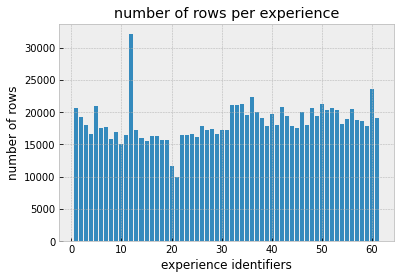

In [13]:
# visualizing row numbers per dataframe

plt.bar(exp_ids,rows_per_df) # ploting the bar plot

plt.xlabel('experience identifiers') # Set X axis info
plt.ylabel('number of rows') # Set Y axis info
plt.title('number of rows per experience') # Set the title of the bar plot
plt.show() # Show the figure

II.1.2. Number of useful rows per experience

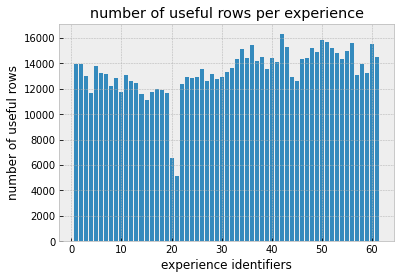

In [14]:
# visualizing useful rows per dataframe

plt.bar(exp_ids,useful_rows_per_df) # ploting the bar plot
plt.xlabel('experience identifiers') # Set X axis info
plt.ylabel('number of useful rows') # Set y axis info
plt.title('number of useful rows per experience') # Set the title of the figure
plt.show() # show the figure

Detrimining Number of rows and Mean time per each activity<br>
行数および各アクティビティの平均時間

In [15]:
# A list will contain number of rows per activity
rows_per_activity=[]

# a list will contain the number of times each activity was performed in the protocol of all experiences
count_act=[]

for i in range(1,13):# iterating over activity ids（全部でアクティビティが12個）
    
    # a dataframe contains start and end labels for all experiences while users were performing the same activity
    start_end_df =Labels_Data_Frame[Labels_Data_Frame['activity_number_ID']==i][['Label_start_point','Label_end_point']]
    
    # add to the list the number of times this activity was performed in all experiences
    # 同じ行動の出現回数
    count_act.append(len(start_end_df))
    
    # start_sum is the sum of all start_label values in start_end_df
    # end_sum is the sum of all end_label values in start_end_df
    start_sum,end_sum=start_end_df.sum()
    
    # number of rows related to the activity
    number_of_rows=end_sum-start_sum+len(start_end_df)
    
    # storing number of rows in a list
    rows_per_activity.append(number_of_rows)


# mean duration in seconds of each activity:
# 同様の行動をした行数の合計を，50[hz]に同じ行動の出現回数をかけたもので割れば，各行動の平均時間を算出できる
time_per_activity=[rows_per_activity[i]/(float(50)*count_act[i]) for i in range(len(rows_per_activity))]

# activity ids from 1 to 12
activity_ids=[i for i in range(1,13)]

**II.1.3 Number of rows per activity:**<br>
    * In this visualzition we calculate the number of rows per activity using all experiences.

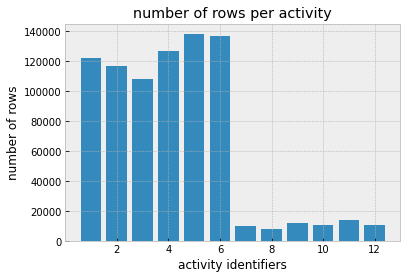

In [16]:
# visualizing the number of rows per activity
plt.bar(activity_ids,rows_per_activity) # plot bar's figure
plt.xlabel('activity identifiers') # Set x axis info
plt.ylabel('number of rows') # Set y axis info
plt.title('number of rows per activity') # set the figure's title
plt.show() # showing the figure

**II.1.4. Mean time per activity**

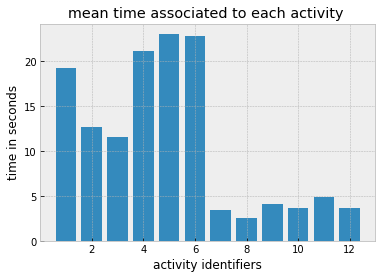

In [17]:
plt.bar(activity_ids,time_per_activity)# plot bar's figure
plt.xlabel('activity identifiers') # Set x axis info
plt.ylabel('time in seconds') # Set y axis info
plt.title('mean time associated to each activity ') # Set the figure's title
plt.show() # showing the figure

<a id='step23'></a>
## II.2. Detailed Visualizations 

- [**II.2.1. Define visualize_triaxial_signals (visualization function)**](#step233)

- [**II.2.2. Visualize acc and gyro signals for two experiences** ](#step234) 

- [**II.2.3. Define a look up function to explore labels file**](#step236)

- [**II.2.4. Display some rows in labels file**](#step237) 

- [**II.2.5. Visualize signals related to Basic Activities for sample 2**](#step239)

- [**II.2.6. Visualize signals related to Postural Transitions for sample 2**](#step241)

- **Info**<br>
サンプルとして2つのデータフレームを選択（2つ目のデータフレームはランダムに選択）。
   - 両方のデータフレームについて、グローバルですべての加速度信号とジャイロ信号を可視化する。
   - 片方のデータフレームで、いくつかの固定アクティビティに関連する信号を可視化する。

<a id='step232'></a>
- **Step 0: Selecting two samples**   
    * samples keys are:'exp01_user01' and 'exp47_user23'

In [18]:
# Two full samples:
sample01_01 = raw_dic['exp01_user01'] # acc and gyro signals of exp 01 user 01
sample47_23 = raw_dic['exp47_user23'] # acc and gyro signals of exp 47 user 23

 <a id='step233'></a>
### II.2.1. Define *visualize_triaxial_signals* (visualization function)

In [19]:
# サンプリング周波数
sampling_freq=50 # 50 Hz(hertz) is sampling frequency: the number of captured values of each axial signal per second.


# ３軸の信号を表示関数（acc or gyro）
def visualize_triaxial_signals(data_frame,exp_id,act,sig_type,width,height):
    
    
    # inputs: Data_frame: Data frame contains acc and gyro signals                                                 #
    #         exp_id: integer from 1 to 61 (the experience identifier)                                             #         
    #         width: integer the width of the figure                                                               #
    #         height: integer the height of the figure                                                             #
    #         sig_type: string  'acc' to visualize 3-axial acceleration signals or 'gyro' for 3-axial gyro signals #
    #         act: possible values: string: 'all' (to visualize full signals) ,                                    #
    #              or integer from 1 to 12 to specify the activity id to be visualized                             #
    #                                                                                                              #
    #              if act is from 1 to 6 it will skip the first 250 rows(first 5 seconds) from                     #
    #              the starting point of the activity and will visualize the next 400 rows (next 8 seconds)        #
    #              if act is between 7 and 12  the function will visualize all rows(full duration) of the activity.# 
    
    '''
    actが1から6の場合、活動の開始点から最初の250行（最初の5秒）をスキップし、次の400行（次の8秒）を視覚化します。
    actが7から12の場合、この関数は活動の全行（全時間）を視覚化します。
    （時間はf=50[Hz]より算出）
    '''
    
    
    keys=sorted(raw_dic.keys()) # list contains 'expXX_userYY' sorted from 1 to 61
    key=keys[exp_id-1] # the key associated to exp_id (experience)
    exp_id=str(exp_id)
    # key値のうち，ユーザのみ取り出す
    user_id=key[-2:] # the user id associated to this experience in string format
    
    if act=='all': # to visualize full signal
        
        # selecting all rows in the dataframe to be visualized, 
        # the dataframe stored in raw_dic and has the same key
        data_df=data_frame.copy()
        
    else:# act is an integer from 1 to 12 (id of the activity to be visualized ) 
        
        # Select rows in labels file having the same exp_Id and user_Id mentioned above + the activity id (act)
        # selecting the first result in the search made in labels file
        # and select the start point and end point of this row related to this activity Id (act) 
        start_point,end_point=Labels_Data_Frame[
                             (Labels_Data_Frame["experiment_number_ID"]==int(exp_id))&
                             (Labels_Data_Frame["user_number_ID"]==int(user_id))&
                             (Labels_Data_Frame["activity_number_ID"]==act)
                            ][['Label_start_point','Label_end_point']].iloc[0] # ラベルファイル内で行われた検索で最初の結果を選択する
        
        # 活動ID（act）に関連するこの行の開始点と終了点を選択
        if int(act) in [1,2,3,4,5,6]:# if the activity to be visualed is from 1 to 6 (basic activity)
            # skip the first 250 rows(5 second)
            start_point=start_point+250
            
            # set the end point at distance of 400 rows (8seconds) from the start_point
            end_point=start_point+400
    
        
        # select the 8 seconds shifted by 5 seconds if act between 1 and 6 
        # if act is between 7 and 12 select the full duration of the first result(row)
        # 表示データを選択
        data_df=data_frame[start_point:end_point].copy()
    
    
    ##################################
    
    
    # a list contain all column names of the  (6 columns in total)
    columns=data_df.columns

    if sig_type=='acc':# if the columns to be visualized are acceleration columns
        
        # acceleration columns are the first 3 columns acc_X, acc_Y and acc_Z
        X_component=data_df[columns[0]] # copy acc_X
        Y_component=data_df[columns[1]] # copy acc_Y
        Z_component=data_df[columns[2]] # copy acc_Z
        
        # accelerations legends
        legend_X='acc_X'
        legend_Y='acc_Y'
        legend_Z='acc_Z'

        # the figure y axis info
        figure_Ylabel='Acceleration in 1g'
        
        # select the right title in each case
        
        if act=='all':
            title="acceleration signals for all activities performed by user "+ user_id +' in experience '+exp_id
        
        elif act in [1,2,3,4,5,6,7,8,9,10,11,12]:
            title="acceleration signals of experience " + exp_id + " while user "+ user_id +' was performing activity: '+str(act)+ '('+AL[act]+')'

    elif sig_type=='gyro':# if the columns to be visualized are gyro columns
        
        # gyro columns are the last 3 columns gyro_X, gyro_Y and gyro_Z
        X_component=data_df[columns[3]] # copy gyro_X
        Y_component=data_df[columns[4]] # copy gyro_Y
        Z_component=data_df[columns[5]] # copy gyro_Z
        
        # gyro signals legends
        legend_X='gyro_X'
        legend_Y='gyro_Y'
        legend_Z='gyro_Z'
        
        #the figure y axis info
        figure_Ylabel='Angular Velocity in radian per second [rad/s]'
        
        # select the right title in each case 
        if act=='all':
            title="gyroscope signals for all activities performed by user "+ user_id +' in experience '+exp_id
        elif act in [1,2,3,4,5,6,7,8,9,10,11,12]:
            title="gyroscope signals of experience "+ exp_id+" while user "+ user_id +' was performing activity: '+str(act)+ '('+AL[act]+')'

    # chosing colors : red for X component blue for Y component and green for Z component
    colors=['r','b','g']
    # number of rows in this dataframe to be visualized(depends on 'act' variable)
    len_df=len(data_df)
    
    # converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
    # 横軸の点のリスト
    time=[1/float(sampling_freq) * j for j in range(len_df)]
    
    # Define the figure and setting dimensions width and height
    fig = plt.figure(figsize=(width,height))
    
    # ploting each signal component
    _ =plt.plot(time,X_component,color='r',label=legend_X)
    _ =plt.plot(time,Y_component,color='b',label=legend_Y)
    _ =plt.plot(time,Z_component,color='g',label=legend_Z)
    
    # Set the figure info defined earlier
    _ = plt.ylabel(figure_Ylabel) # set Y axis info 
    _ = plt.xlabel('Time in seconds (s)') # Set X axis info (same label in all cases)
    _ = plt.title(title) # Set the title of the figure
    
    # localise the figure's legends
    _ = plt.legend(loc="upper left")# upper left corner
    
    # showing the figure
    plt.show()

<a id='step234'></a>
### II.2.2.  Visualize acc and gyro signals for both samples

* **1.** Visualzing acceleration signals for all activities of experience 01
* **2.** Visualzing gyroscope signals for all activities of experience 01

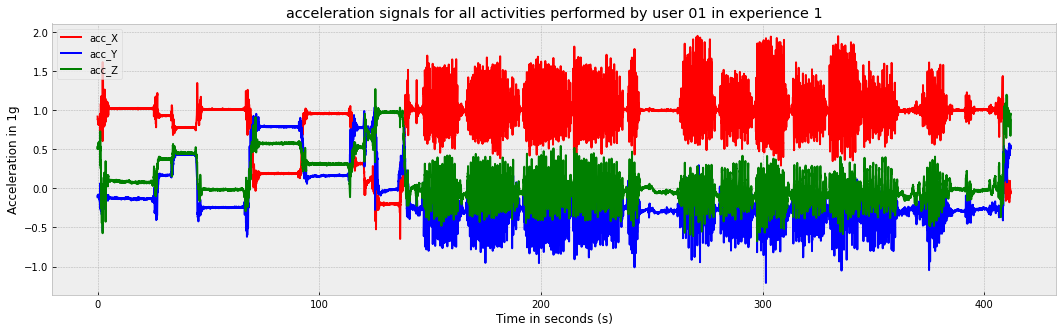

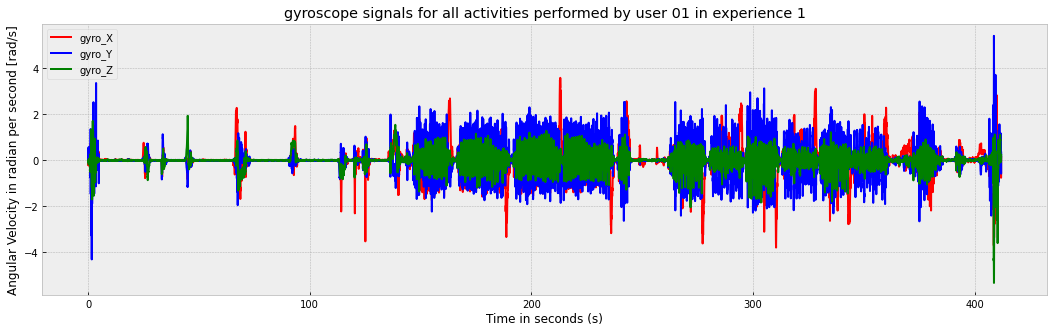

In [20]:
################# plotting acc signals for the first sample ######################
# figure parameters : width=18 height=5
# exp_id=1
#                          DataFrame  , exp_Id, act , sig_type  ,Width,height
visualize_triaxial_signals(sample01_01,   1   ,'all',    'acc'  ,  18 ,  5   )  
# sig_type='acc' to visulize acceleration signals
# act='all' to visualize full duration of the dataframe



################# plotting gyro signals for the first sample ######################
# figure parameters : width=18 height=5
# exp_id=1
# act='all' to visualize full duration of the dataframe
visualize_triaxial_signals(sample01_01,1,'all','gyro',18,5) 
# sig_type='gyro' to visualize gyro signals
# act='all' to visualize full duration of the dataframe

* **3.** Visualzing acceleration signals for all activities of experience 47
* **4.** Visualzing gyroscope signals for all activities of experience 47

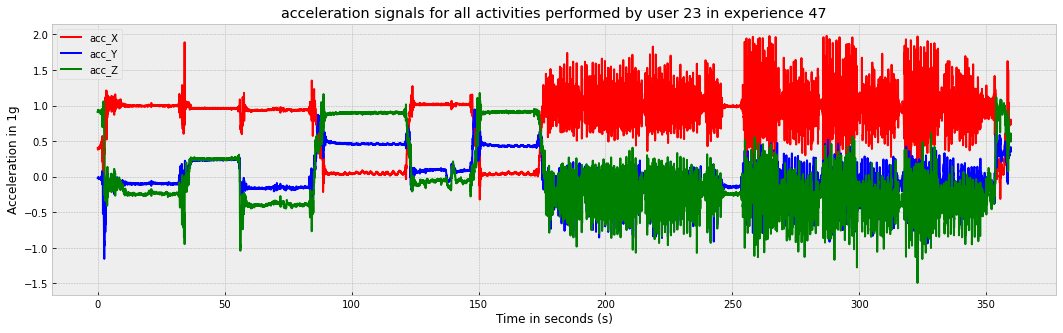

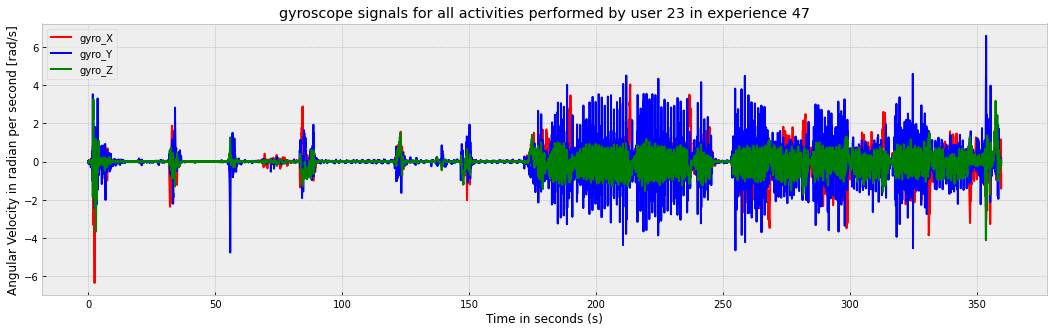

In [21]:
################# plotting acc signals for the second sample ######################
# figure parameters : width=18 height=5
# exp_id=47 user_id=23
# act='all' to visualize full duration of the dataframe
visualize_triaxial_signals(sample47_23,47,'all','acc',18,5) # sig_type='acc' to visulize acceleration signals


################# plotting gyro signals for the second sample ######################
# figure parameters : width=18 height=5
# exp_id=47 user_id=23
# act='all' to visualize full duration of the dataframe
visualize_triaxial_signals(sample47_23,47,'all','gyro',18,5) # sig_type='gyro' to visualize gyro signals

 <a id='step236'></a>
### II.2.3. Define a look up function to explore labels file
* The look up function generates start and end labels points of activity ID in a dataframe **expXX_userYY**
* ルックアップ機能により、アクティビティIDの開始ラベルポイント、終了ラベルポイントをデータフレームexpXX_userYYに生成する。

In [22]:
########################FUNCTION: look_up(exp_ID,user_ID,activity_ID)#########################


def look_up(exp_ID,activity_ID):
    
    # Inputs:                                                                            #
    #   exp_ID  : integer , the experiment Identifier from 1 to 61 (61 included)         #
    #                                                                                    #
    #   activity_ID: integer  the activity Identifier from 1 to 12 (12 included)         #
    # Outputs:                                                                           #
    #   dataframe: A pandas Dataframe which is a part of Labels_Data_Frame contains      #
    #             the activity ID ,the start point  and the end point  of this activity  #
    
    user_ID=int(sorted(raw_dic.keys())[exp_ID -1][-2:])
    
    # To select rows in labels file of a fixed activity in a fixed experiment 
    return Labels_Data_Frame[
                             (Labels_Data_Frame["experiment_number_ID"]==exp_ID)&
                             (Labels_Data_Frame["user_number_ID"]==user_ID)&
                             (Labels_Data_Frame["activity_number_ID"]==activity_ID)
                            ]

<a id='step237'></a>
### II.2.4. Display some rows in labels file using the look up function
    

In [23]:
for activity_Id in range(1,13):# iterating throw activity ids from 1 to 12
    # expID=47 （固定）
    # It returns all Label_start_point and Label_end_point of this (activityID,expID)
    print('Activity number '+str(activity_Id))
    display(look_up(47 ,activity_Id)) # display the results of each search

Activity number 1


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
926,47,23,1,9607,10673
927,47,23,1,10809,11815


Activity number 2


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
929,47,23,2,13522,14142
931,47,23,2,15055,15729
933,47,23,2,16692,17355


Activity number 3


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
928,47,23,3,12723,13402
930,47,23,3,14294,14952
932,47,23,3,15892,16556


Activity number 4


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
916,47,23,4,1820,2774
922,47,23,4,6213,7340


Activity number 5


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
914,47,23,5,424,1597
918,47,23,5,2925,4223


Activity number 6


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
920,47,23,6,4484,6041
924,47,23,6,7560,8660


Activity number 7


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
915,47,23,7,1598,1819


Activity number 8


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
917,47,23,8,2775,2924


Activity number 9


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
923,47,23,9,7341,7559


Activity number 10


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
921,47,23,10,6042,6212


Activity number 11


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
919,47,23,11,4224,4483


Activity number 12


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
925,47,23,12,8661,8821


上記の結果から、以下のように思われます。
    - 動的活動2回（活動02：階段を上る**、活動03：階段を下りる**）が3回実施された。
    - 4つの基本アクティビティ（1つの動的アクティビティと3つの静的アクティビティ）を2回実施（アクティビティ01：**歩く**、アクティビティ04：**座る**、アクティビティ05：**立つ**、アクティビティ06：**横たわる**）した。
    - 7から12までのすべての姿勢移行アクティビティIDをそれぞれ1回ずつ実施した。

<a id='step239'></a>
### II.2.5. Visualize signals related to *Basic Activities* for sample N° 2


* In this detailed visualization i choosed to :
    - skip the first 5 seconds (the first 250 row) after the Label_start_point and visualize the next 8 seconds (400 row) of each basic activity using the first search results in each table above.
    - For postural transitions i decide to visualize all their full duration.
<br>
* この詳細な可視化では、以下を選択した。
    - Label_start_pointの後の最初の5秒（最初の250行）をスキップし、上記の各テーブルの最初の検索結果を使用して、各基本的活動の次の8秒（400行）を視覚化します。
    - 姿勢の遷移については、その全時間を可視化することにしました。

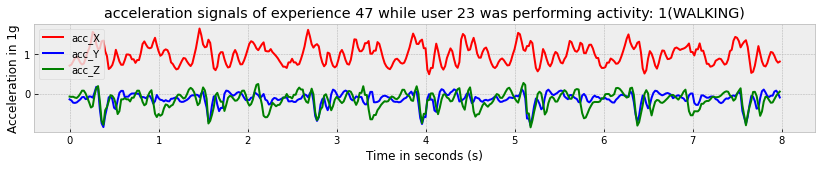

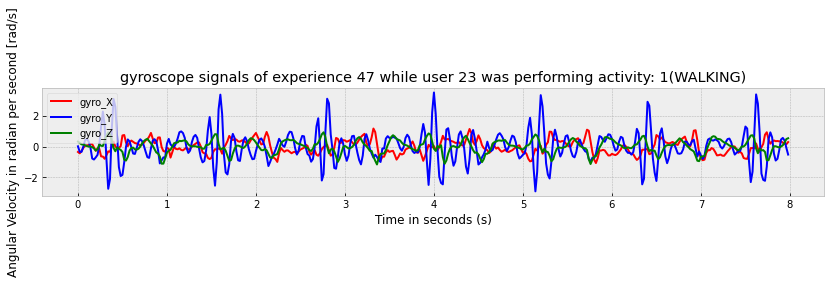

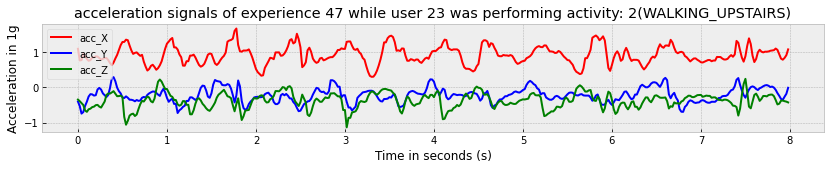

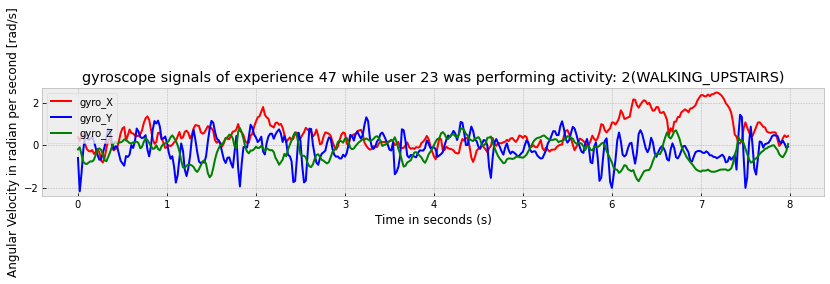

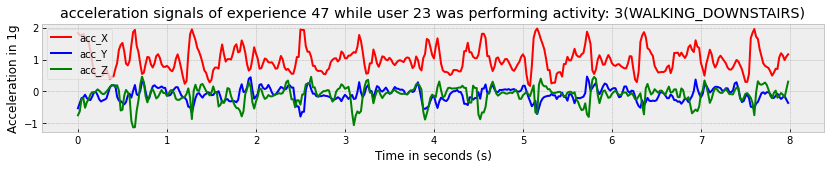

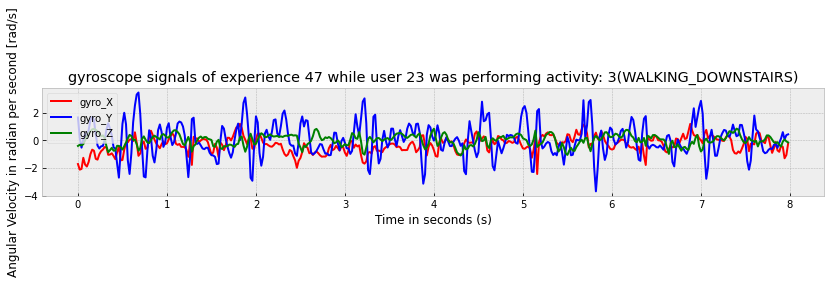

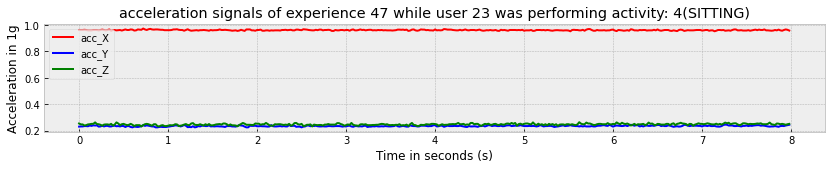

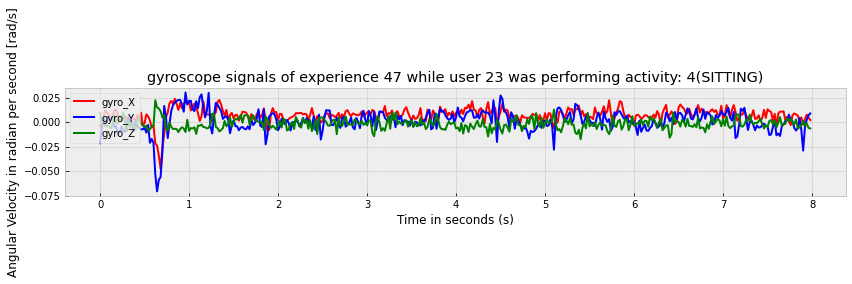

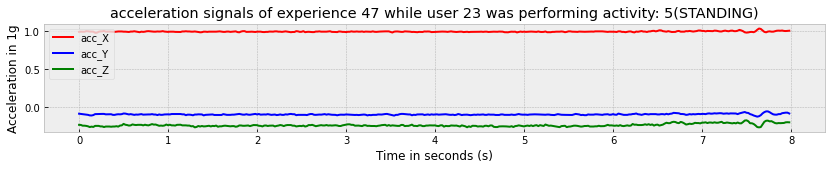

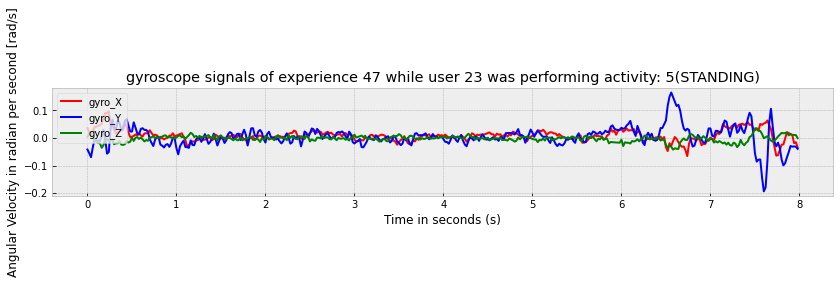

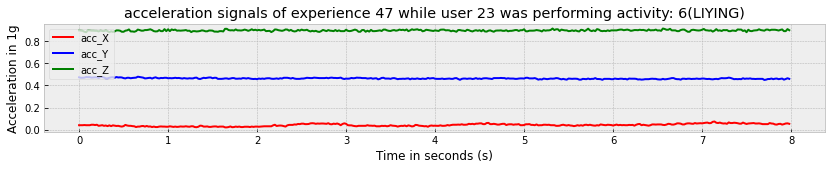

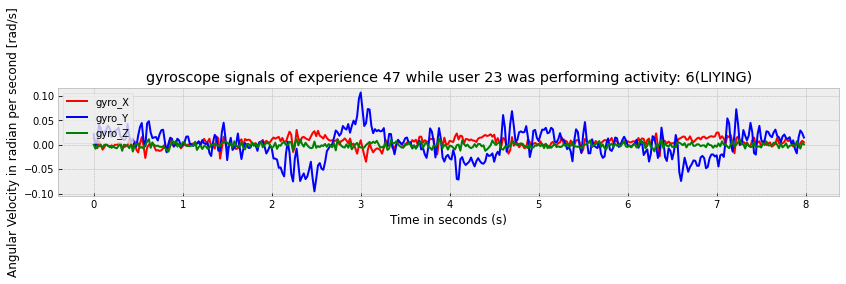

In [24]:
# visualize Basic activities from 1 to 6
for act in range(1,7): # Iterating throw each activity Id from 1 to 6
    visualize_triaxial_signals(sample47_23,47,act,'acc',14,2) # visualize acc signals related to this activity
    visualize_triaxial_signals(sample47_23,47,act,'gyro',14,2) # visualize gyro signals reated to this activity

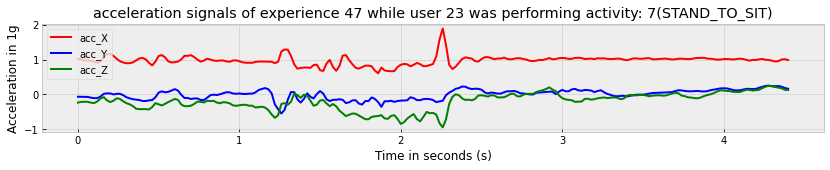

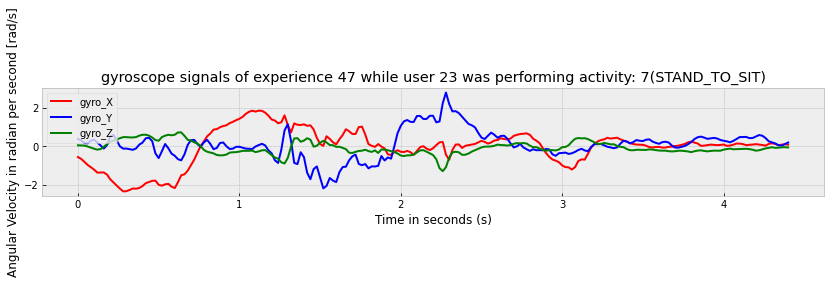

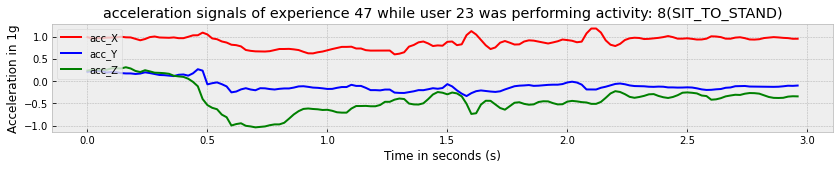

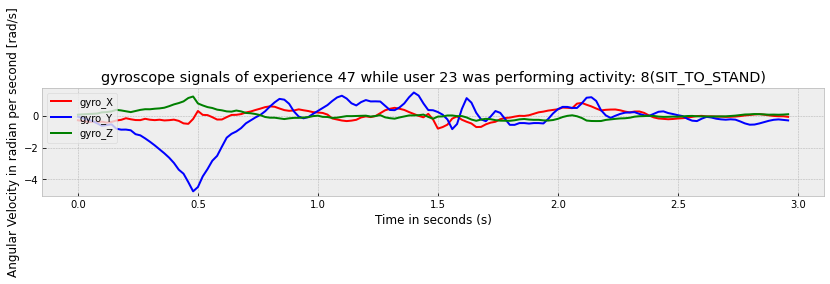

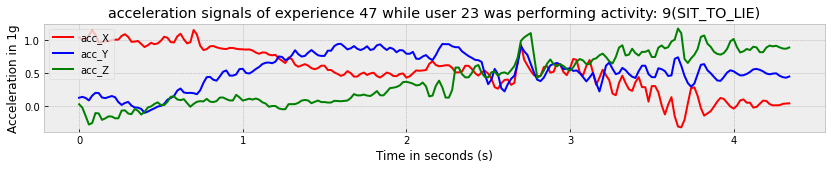

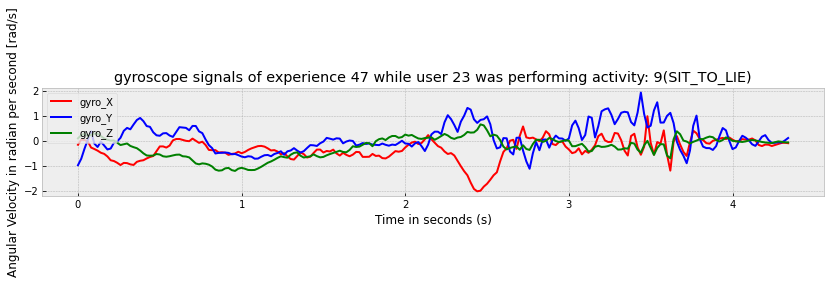

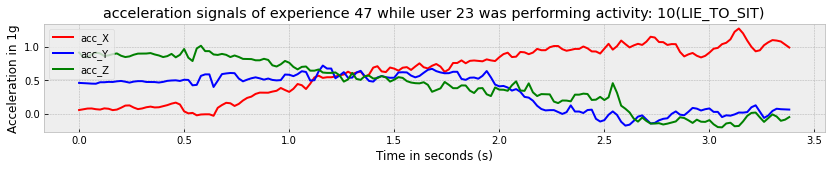

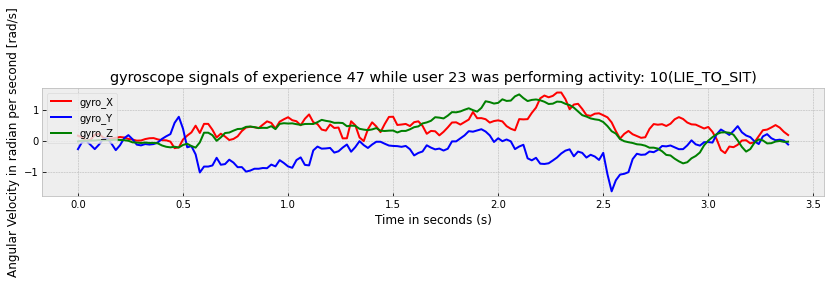

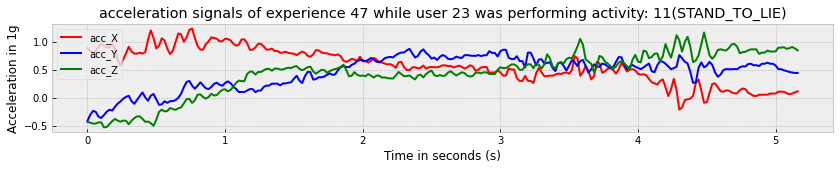

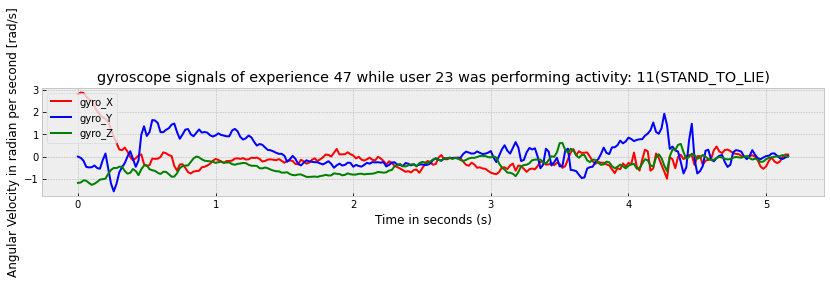

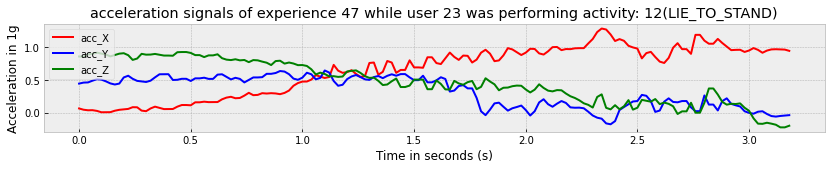

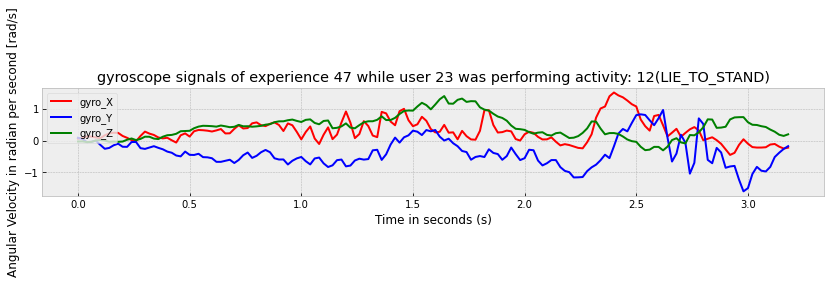

In [25]:
# visualize postural transitions (act_id from 7 to 12)
for activity_Id in range(7,13): # iterating throw each activity Ids from 7 to 12
    visualize_triaxial_signals(sample47_23,47,activity_Id,'acc',14,2) # visualize acc signals related to this activity
    visualize_triaxial_signals(sample47_23,47,activity_Id,'gyro',14,2) # visualize gyro signals related to this activity

## III. Signal Processing PipeLine

### [**III.1. Generating time domain signals**](#step32)

### [**III.2. Windowing**](#step33) 

### [**III.3. Features Generation**](#step34)

### III.1 Generating time domain signals

**Step 0:** Define visualize_signal (visualization function)

In [26]:
# 信号の可視化
def visualize_signal(signal,x_labels,y_labels,title,legend):
    # Inputs: signal: 1D column 
    #         x_labels: the X axis info (figure)
    #         y_labels: the Y axis info (figure)
    #         title: figure's title
    #         legend : figure's legend
    
    
    
    # Define the figure's dimensions
    plt.figure(figsize=(20,4))
    
    # convert row numbers in time durations
    time=[1/float(sampling_freq) *i for i in range(len(signal))]
    
    # plotting the signal
    plt.plot(time,signal,label=legend) # plot the signal and add the legend
    
    plt.xlabel(x_labels) # set the label of x axis in the figure
    plt.ylabel(y_labels) # set the label of y axis in the figure
    plt.title(title) # set the title of the figure
    plt.legend(loc="upper left") # set the legend in the upper left corner
    plt.show() # show the figure

<a id='step323'></a>
### III.1.1. Median Filtering (3rd order)
Step 1: Define Median Filter 3rd Order Funtion<br>

In [27]:
# The last value is not changed 
# The first value is the median of signal[0:3]
# The second value is the median of signal[0:3]
# The third value is the median of signal[1:4]

# The value before the last is the median of signal[-3:]
# The last value is last value in the original signal

# Median Filter: was applied to reduce background noise.
from scipy.signal import medfilt # import the median filter function

def median(signal):# input: numpy array 1D (one column)
    
    array=np.array(signal)
    
    # applying the median filter order3(kernel_size=3)
    med_filtered=medfilt(array, kernel_size=3)
    
    return  med_filtered # return the med-filtered signal: numpy array 1D

Step 2: Apply the Median Filter and visualize its effects on one signal<br>
（Median Filter: was applied to reduce background noise.）

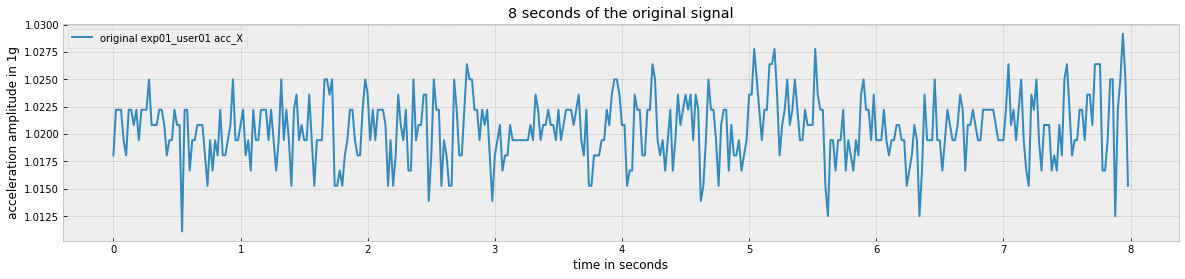

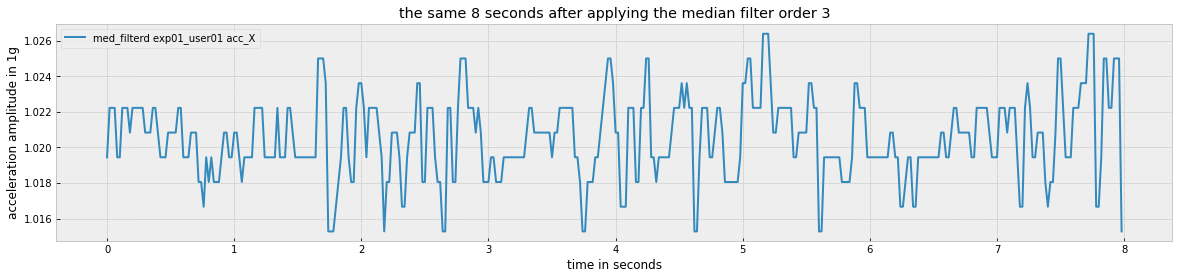

In [28]:
# testing the filter to see its effects on signals

# selecting the signal to be filtered in this case :exp01_user01 acc_X
signal_sample=np.array(sample01_01['acc_X']) 

# generating the filtered signal（フィルタの適用）
med_filtred_signal=median(signal_sample)

# set figures' legends, x labels, y labels and titles
legend1='original exp01_user01 acc_X'
legend2='med_filterd exp01_user01 acc_X'
x_labels='time in seconds'
y_labels='acceleration amplitude in 1g'
title1='8 seconds of the original signal'
title2='the same 8 seconds after applying the median filter order 3'

# skip the first 500 rows (10 seconds) visualize the next 400 rows (8 seconds) for both signals (the original and the filtred ones)
visualize_signal(signal_sample[500:900],x_labels,y_labels,title1,legend1) 
visualize_signal(med_filtred_signal[500:900],x_labels,y_labels,title2,legend2)

<a id='step324'></a>       
### III.1.2 Useful Components Selection

Step 1: Define components_selection_one_signal

In [29]:
# necessary functions

# import fft(Fast Fourier Transform) function to convert a signal from time domain to 
# frequency domain (output :is a numpy array contains signal's amplitudes of each frequency component)
# 高速フーリエ変換
from scipy.fftpack import fft   

# import fftfreq function to generate frequencies related to frequency components mentioned above
# fftの周波数成分に関連する周波数を生成する機能
from scipy.fftpack import fftfreq

# import ifft function (inverse fft) inverse the conversion
# 高速フーリエ逆変換
from scipy.fftpack import ifft

# import math library
import math

############################## Constants #############################

# ナイキスト周波数：サンプリング周波数の1/2に相当する周波数
nyq=sampling_freq/float(2) # nyq is the nyquist frequency equal to the half of the sampling frequency[50/2= 25 Hz]

# カットオフ周波数
freq1 = 0.3 # freq1=0.3 hertz [Hz] the cuttoff frequency between the DC compoenents [0,0.3]
#           and the body components[0.3,20]hz
freq2 = 20  # freq2= 20 Hz the cuttoff frequcency between the body components[0.3,20] hz
#             and the high frequency noise components [20,25] hz



# Function name: components_selection_one_signal

# Inputs: t_signal:1D numpy array (time domain signal); 

# Outputs: (total_component,t_DC_component , t_body_component, t_noise) 
#           type(1D array,1D array, 1D array)

# cases to discuss: if the t_signal is an acceleration signal then the t_DC_component is the gravity component [Grav_acc]
#                   if the t_signal is a gyro signal then the t_DC_component is not useful
# t_noise component is not useful
# if the t_signal is an acceleration signal then the t_body_component is the body's acceleration component [Body_acc]
# if the t_signal is a gyro signal then the t_body_component is the body's angular velocity component [Body_gyro]

def components_selection_one_signal(t_signal,freq1,freq2):
    
    t_signal=np.array(t_signal)
    t_signal_length=len(t_signal) # number of points in a t_signal
    
    # the t_signal in frequency domain after applying fft
    f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)
    
    # generate frequencies associated to f_signal complex values
    freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]
    
    # DC_component: f_signal values having freq between [-0.3 hz to 0 hz] and from [0 hz to 0.3hz] 
    #                                                             (-0.3 and 0.3 are included)
    
    # noise components: f_signal values having freq between [-25 hz to 20 hz[ and from ] 20 hz to 25 hz] 
    #                                                               (-25 and 25 hz inculded 20hz and -20hz not included)
    
    # selecting body_component: f_signal values having freq between [-20 hz to -0.3 hz] and from [0.3 hz to 20 hz] 
    #                                                               (-0.3 and 0.3 not included , -20hz and 20 hz included)
    
    
    f_DC_signal=[] # DC_component in freq domain
    f_body_signal=[] # body component in freq domain numpy.append(a, a[0])
    f_noise_signal=[] # noise in freq domain
    
    for i in range(len(freqs)):# iterate over all available frequencies
        
        # selecting the frequency value
        freq=freqs[i]
        
        # selecting the f_signal value associated to freq
        value= f_signal[i]
        
        # Selecting DC_component values 
        if abs(freq)>0.3:# testing if freq is outside DC_component frequency ranges
            f_DC_signal.append(float(0)) # add 0 to  the  list if it was the case (the value should not be added)                                       
        else: # if freq is inside DC_component frequency ranges 
            f_DC_signal.append(value) # add f_signal value to f_DC_signal list
    
        # Selecting noise component values 
        if (abs(freq)<=20):# testing if freq is outside noise frequency ranges 
            f_noise_signal.append(float(0)) # # add 0 to  f_noise_signal list if it was the case 
        else:# if freq is inside noise frequency ranges 
            f_noise_signal.append(value) # add f_signal value to f_noise_signal

        # Selecting body_component values 
        if (abs(freq)<=0.3 or abs(freq)>20):# testing if freq is outside Body_component frequency ranges
            f_body_signal.append(float(0))# add 0 to  f_body_signal list
        else:# if freq is inside Body_component frequency ranges
            f_body_signal.append(value) # add f_signal value to f_body_signal list
    
    
    
    ################### Inverse the transformation of signals in freq domain ########################
    ################################### 逆フーリエ変換 ################################################
    
    # applying the inverse fft(ifft) to signals in freq domain and put them in float format
    t_DC_component= ifft(np.array(f_DC_signal)).real
    t_body_component= ifft(np.array(f_body_signal)).real
    t_noise=ifft(np.array(f_noise_signal)).real
    
    total_component=t_signal-t_noise # extracting the total component(filtered from noise) 
                                     #  by substracting noise from t_signal (the original signal).
    
    # return outputs mentioned earlier
    return (total_component,t_DC_component,t_body_component,t_noise) 


Step 2: Test it on a sample<br>
Step 3: Verify Gravity Magnitudes
- [ Define verify gravity function](#step32442) 
- [Gravity visualization](#step32443)

このフィルタリング関数が正しいかどうかは、次のようにして確認することができる。
- 重力ユークリッドの大きさ grav_acc_mag を [grav_acc_X,grav_acc_Y,grav_acc_Z] で可視化する。
- 加速度の単位が g であるため、重力の大きさは 1 に近いはずである。

<a id='step32442'></a>
1. Define verify gravity function

In [30]:
import math

# Euclidian magnitude
# 加速度の合成
def mag_3_signals(x,y,z):
    return [math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))]

In [31]:

def verify_gravity(exp_id):
    # inputs: exp_id integer from 1 to 61
    
    keys=sorted(raw_dic.keys())# expXX_userYY ordered from 1 to 61
    key=keys[exp_id-1]# select the key associated to exp_id
    
    # 信号を取り出す
    acc_x=np.array(raw_dic[key]['acc_X']) # copy acc_X column from dataframe in raw_dic having the key mentioned above
    acc_y=np.array(raw_dic[key]['acc_Y'])# copy acc_Y column  from dataframe in raw_dic having the key mentioned above
    acc_z=np.array(raw_dic[key]['acc_Z'])# copy acc_Z column  from dataframe in raw_dic having the key mentioned above

    # apply the filtering method to acc_[X,Y,Z] and store gravity components
    grav_acc_X=components_selection_one_signal(acc_x,freq1,freq2)[1] 
    grav_acc_Y=components_selection_one_signal(acc_y,freq1,freq2)[1]
    grav_acc_Z=components_selection_one_signal(acc_z,freq1,freq2)[1]
    
    # calculating gravity magnitude signal
    grav_acc_mag=mag_3_signals(grav_acc_X, grav_acc_Y,grav_acc_Z)

    x_labels='time in seconds' # Set x axis info
    # 1g単位での重力振幅 
    y_labels='gravity amplitude in 1g' # set y axis info
    title='the euclidian magnitude of gravity 3-axial signals' # set the figure's title
    legend=key+' grav_acc_mag' # set the figure's legend
    
    visualize_signal(grav_acc_mag,x_labels,y_labels,title,legend) # visualize gravity magnitude signal
    
    # 有効数字5ケタで表示
    print('mean value = '+str(np.array(grav_acc_mag).mean())[0:5]+ ' g') # print the gravity magnitude mean value

<a id='step32443'></a>
2. Gravity Magnitude visualization

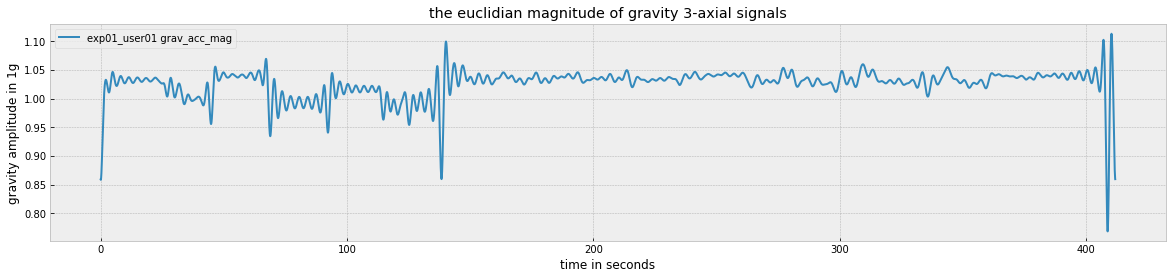

mean value = 1.025 g


In [32]:
# apply the function to dataframe related to " experience 01 "
verify_gravity(1)

3.1.3. Jerking（加加速度） function & Magnitude function

- [**Define jerking and magnitude functions**](#step3252)

<a id='step3252'></a>
Define jerking and magnitude functions

In [33]:
##########################################Jerk Signals Functions #####################################

# d(signal)/dt : the Derivative
# jerk(signal(x0)) is equal to (signal(x0+dx)-signal(x0))/dt （加加速度 ＝ 加速度の微分）
# Where: signal(x0+dx)=signal[index[x0]+1] and  signal(x0)=signal[index[x0]]


dt=0.02 # dt=1/50=0.02s time duration between two rows
# Input: 1D array with lenght=N (N:unknown)
# Output: 1D array with lenght=N-1

# 加速度の微分の近似値を求める
def jerk_one_signal(signal): 
        return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)])

In [34]:
################################ Magnitude Function ######################################
import math 

# 加速度の合成
def mag_3_signals(x,y,z):# magnitude function redefintion
    return np.array([math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))])


<a id='step326'></a>
### 3.1.5. Time domain signals generation (important !!)
- [**Time domain signals generation PipeLine**](#step3261)

<a id='step3261'></a>
Time domain signals generation PipeLine<br>
時間信号の生成パイプライン（時間の特徴量抽出ための信号を生成）

In [35]:
time_sig_dic={} # An empty dictionary will contains dataframes of all time domain signals
raw_dic_keys=sorted(raw_dic.keys()) # sorting dataframes' keys

for key in raw_dic_keys: # iterate over each key in raw_dic
    
    raw_df=raw_dic[key] # copie the raw dataframe associated to 'expXX_userYY' from raw_dic
    
    time_sig_df=pd.DataFrame() # a dataframe will contain time domain signals
    
    for column in raw_df.columns: # iterate over each column in raw_df
        
        t_signal=np.array(raw_df[column]) # copie the signal values in 1D numpy array
        
        med_filtred=median(t_signal) # apply 3rd order median filter and store the filtred signal in med_filtred
        
        if 'acc' in column: # test if the med_filtered signal is an acceleration signal 
            
            # the 2nd output DC_component is " the gravity_acc ""
            # The 3rd one is " the body_component "  which in this case the body_acc
            _,grav_acc,body_acc,_=components_selection_one_signal(med_filtred,freq1,freq2) # apply components selection
            
            body_acc_jerk=jerk_one_signal(body_acc)# apply the jerking function to body components only
            
            
            # store signal in time_sig_dataframe and delete the last value of each column 
            # jerked signal will have the original length-1 (due to jerking)
            
            time_sig_df['t_body_'+column]=body_acc[:-1] # t_body_acc storing with the appropriate axis selected 
            #                                             from the column name
            
            time_sig_df['t_grav_'+column]= grav_acc[:-1] # t_grav_acc_storing with the appropriate axis selected 
            #                                              from the column name
            
            # store  t_body_acc_jerk signal with the appropriate axis selected from the column name
            time_sig_df['t_body_acc_jerk_'+column[-1]]=body_acc_jerk
        
        elif 'gyro' in column: # if the med_filtred signal is a gyro signal
            
            # The 3rd output of components_selection is the body_component which in this case the body_gyro component
            _,_,body_gyro,_=components_selection_one_signal(med_filtred,freq1,freq2)  # apply components selection
            
            body_gyro_jerk=jerk_one_signal(body_gyro) # apply the jerking function to body components only
            
            # store signal in time_sig_dataframe and delete the last value of each column 
            # jerked signal will have the original lenght-1(due to jerking)
            
            time_sig_df['t_body_gyro_'+column[-1]]=body_gyro[:-1] # t_body_acc storing with the appropriate axis selected 
            #                                                       from the column name
            
            time_sig_df['t_body_gyro_jerk_'+column[-1]]=body_gyro_jerk # t_grav_acc_storing with the appropriate axis 
            #                                                            selected from the column name
    
    
    # all 15 axial signals generated above are reordered to facilitate magnitudes signals generation
    # 上記で生成された全15軸の信号は、マグニチュード信号の生成を容易にするために並べ替えられています。
    new_columns_ordered=['t_body_acc_X','t_body_acc_Y','t_body_acc_Z',
                          't_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z',
                          't_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z',
                          't_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z',
                          't_body_gyro_jerk_X','t_body_gyro_jerk_Y','t_body_gyro_jerk_Z']
    
    # create new dataframe to order columns
    ordered_time_sig_df=pd.DataFrame()
    
    for col in new_columns_ordered: # iterate over each column in the new order
        ordered_time_sig_df[col]=time_sig_df[col] # store the column in the ordred dataframe
    
    # Generating magnitude signals
    for i in range(0,15,3): # iterating over each 3-axial signals
        
        mag_col_name=new_columns_ordered[i][:-1]+'mag'# Create the magnitude column name related to each 3-axial signals
        
        col0=np.array(ordered_time_sig_df[new_columns_ordered[i]]) # copy X_component
        col1=ordered_time_sig_df[new_columns_ordered[i+1]] # copy Y_component
        col2=ordered_time_sig_df[new_columns_ordered[i+2]] # copy Z_component
        
        # 合成した重力信号の値を格納
        mag_signal=mag_3_signals(col0,col1,col2) # calculate magnitude of each signal[X,Y,Z]
        ordered_time_sig_df[mag_col_name]=mag_signal # store the signal_mag with its appropriate column name
    
    time_sig_dic[key]=ordered_time_sig_df # store the ordred_time_sig_df in time_sig_dic with the appropriate key

Display a dataframe

In [36]:
# exp01の内容をtest表示

display(time_sig_dic['exp01_user01'].shape) # the of the first dataframe
display(time_sig_dic['exp01_user01'].describe()) # dataframe's statistics
time_sig_dic['exp01_user01'].head(3) # displaying the fisrt three rows

(20597, 20)

,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_grav_acc_X,t_grav_acc_Y,t_grav_acc_Z,t_body_acc_jerk_X,t_body_acc_jerk_Y,t_body_acc_jerk_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,t_body_gyro_jerk_X,t_body_gyro_jerk_Y,t_body_gyro_jerk_Z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
count,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,2.059700e+04,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000
mean,0.000018,-0.000014,-0.000009,0.880358,-0.101501,0.097309,-0.001833,0.001183,0.000849,3.259619e-07,0.000008,0.000010,0.000046,0.000095,0.000362,0.165296,1.025479,3.404274,0.489705,9.439402
std,0.167505,0.123847,0.106477,0.299187,0.314444,0.262835,4.076298,3.237138,2.298076,3.907032e-01,0.497555,0.265791,7.641439,13.033311,5.724163,0.165557,0.025535,4.559251,0.480657,13.111758
min,-0.698870,-0.993486,-0.671478,-0.231975,-0.367943,-0.161622,-38.735217,-33.718078,-24.262993,-3.141414e+00,-2.694787,-4.050512,-90.662943,-158.457438,-89.662267,0.000864,0.768925,0.006144,0.001641,0.017986
25%,-0.044563,-0.024197,-0.042269,0.968003,-0.275034,-0.050273,-0.481136,-0.422376,-0.347403,-1.189116e-01,-0.139441,-0.059319,-1.100310,-1.705868,-0.832493,0.025437,1.021875,0.272200,0.087023,0.506674
50%,-0.001207,0.002857,-0.003154,0.997735,-0.236751,-0.025435,0.003867,0.003613,0.003452,3.737832e-03,-0.002389,0.003384,0.003147,-0.005965,-0.002999,0.114319,1.031724,1.581932,0.348679,4.510858
75%,0.020914,0.051177,0.026000,1.007358,-0.123642,0.090625,0.568717,0.505230,0.381417,1.546320e-01,0.101817,0.088021,1.159630,1.392834,0.799237,0.262351,1.038524,4.837894,0.758609,13.308692
max,1.031485,0.473201,0.493350,1.066684,0.832075,1.015052,34.647970,34.482683,35.302951,2.698454e+00,4.530312,2.260099,95.696959,151.910819,60.809206,1.180706,1.115731,54.209353,6.249451,160.671661


,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_grav_acc_X,t_grav_acc_Y,t_grav_acc_Z,t_body_acc_jerk_X,t_body_acc_jerk_Y,t_body_acc_jerk_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,t_body_gyro_jerk_X,t_body_gyro_jerk_Y,t_body_gyro_jerk_Z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
0,0.382899,-0.206562,-0.169117,0.431759,0.175976,0.720859,8.404087,-5.538872,-3.526643,-0.025624,-0.210093,-0.361419,0.552413,3.197618,-0.792801,0.466776,0.858500,10.665130,0.418831,3.340427
1,0.550980,-0.317339,-0.239649,0.443087,0.169277,0.715098,-9.140781,5.486163,3.704421,-0.014575,-0.146141,-0.377275,-0.185277,11.295307,2.384643,0.679496,0.858106,11.286035,0.404853,11.545770
2,0.368165,-0.207616,-0.165561,0.454376,0.162556,0.709293,3.968636,-2.902182,-2.103241,-0.018281,0.079766,-0.329582,-2.485754,6.100713,-0.485211,0.453938,0.857892,5.347556,0.339590,6.605536


<a id='step33'></a>
## III.2 Windowing


### [**III.2.1. Windowing type 1**](#step333)
### [**III.2.2. Windowing type 2**](#step334)
### [**III.2.3. Frequency Windows Generation**](#step335)

<a id='step332'></a>
#### Step 0: Define supplementery functions

In [37]:
# example: 679 ==> '00679'; 50 ==> '00050'

# it add '0's to the left of the input until the new lenght is equal to 5
def normalize5(number): 
    stre=str(number)
    if len(stre)<5:
        l=len(stre)
        for i in range(0,5-l):
            stre="0"+stre
    return stre 

# it add '0's to the left of the input until the new lenght is equal to 2
def normalize2(number):
    stre=str(number)
    if len(stre)<2:
        stre="0"+stre
    return stre

<a id='step333'></a>
### 3.2.1 Windowing type 1
#### [**Step 1: Define Windowing type 1 function**](#step3332)
#### [**Step 2: Windows type I Generation and Storage**](#step3333)
#### [**Display samples & Discussion**](#step3334)

In [38]:
# inputs: 
# time_sig_dic: dictionary includes all time domain signal's dataframes
# Labels_Data_Frame: labels file defined earlier

# アクティビティごとに分ける
def Windowing_type_1(time_sig_dic,Labels_Data_Frame):   
    
    columns=time_sig_dic['exp01_user01'].columns # columns of time_sig_df
    window_ID=0 # window unique id
    t_dic_win_type_I={} # output dic
    
    # Just Basic Activities
    BA_array=np.array(Labels_Data_Frame[(Labels_Data_Frame["activity_number_ID"] <7)]) 
    
    for line in BA_array:
        # Each line in BA_array contains info realted to an activity

        # extracting the dataframe key that contains rows related to this activity [expID,userID]
        file_key= 'exp' + normalize2(int(line[0]))  +  '_user' + normalize2(int(line[1]))

        # extract the activity_ID in this line
        act_ID=line[2] # The activity identifier from 1 to 6 (6 included)

        # starting point index of an activity
        start_point=line[3]

        
        # ウィンドウサイズ 128行分のデータ
        # from the cursor we copy a window that has 128 rows
        # the cursor step is 64 data point (50% of overlap) : each time it will be shifted by 64 rows
        for cursor in range(start_point,line[4]-127,64):

            # end_point: cursor(the first index in the window) + 128
            end_point=cursor+128 # window end row

            # selecting window data points convert them to numpy array to delete rows index
            data=np.array(time_sig_dic[file_key].iloc[cursor:end_point])

            # converting numpy array to a dataframe with the same column names
            window=pd.DataFrame(data=data,columns=columns)

            # creating the window
            key='t_W'+normalize5(window_ID)+'_'+file_key+'_act'+normalize2(act_ID)
            t_dic_win_type_I[key]=window

            # incrementing the windowID by 1
            window_ID=window_ID+1
        
    return t_dic_win_type_I # return a dictionary including time domain windows type I

<a id='step3333'></a>
#### Windows type I Generation and Storage


In [46]:
# apply the sliding window type 1 to "time_sig dic"
t_dic_win_type_I  = Windowing_type_1(time_sig_dic,Labels_Data_Frame)


<a id='step334'></a>
### III.2.2 Windowing type 2
#### [Step 1: Define the Voting function](#step3342)
#### [Step 2: Define Windowing type II](#step3344)
#### [Step 3: Windows type II Generation and Storage](#step3345)
#### [Display Samples & Discussion](#step3346)			

<a id='step3342'></a>
#### Step 1: Define the Voting function

In [39]:
# The voting Function:

# inputs:
#         Labels_Data_Frame: Dataframe defined earlier
#         exp_ID: the experience id of the dataframe the windowing function type II is dealing with
#         Cursor: index of the first row of a window


# cursorとend_point間に1番近い行動を探索
def find_activity(Labels_Data_Frame,exp_ID,cursor,end_point):
    
    # array contains all rows from Labels_Data_Frame having related to experience :exp_ID
    exp_AL=np.array(Labels_Data_Frame[Labels_Data_Frame['experiment_number_ID']==exp_ID])
    
    
    # cursor前（first）と，end_point後（second）のactibity
    # the near starting point above(inferior) the cursor
    St_p1=exp_AL[exp_AL[:,3]<=cursor][:,3].max()  # starting point label of the first activity
    
    # the near ending point below the cursor (superior) 
    En_p2=exp_AL[exp_AL[:,4]>=end_point][:,4].min() # ending point label of the second activity

    for index in range(len(exp_AL)): # iterating over each line 
        
        if exp_AL[index,3]==St_p1: # selecting the row index with starting point 
            Ind1=index # index of the first activity
        
        if exp_AL[index,4]==En_p2: # selecting the row index with ending point ==b
            Ind2=index # the index of the second activity
    
    if Ind1 == Ind2 : # if the window rows indexes are inside the same activity data points which means 
        #                that the first and second activity are actually the same 
        
        activity=exp_AL[Ind1,2] # window_activity id will take the same value as the activity_label of these rows
    
    else:
        
        # exp_AL[Ind1,4] is the ending_point_label of the first activity
        if cursor+63 <= exp_AL[Ind1,4]:# if the first 64 data points or more are included in the first activity bands
            activity=exp_AL[Ind1,2] # the window will take the same activity labels as the first activity
        
        # exp_AL[Ind2,3] is the starting_point_label of the second activity
        elif cursor+64 >= exp_AL[Ind2,3]:# if the last 64 data points or more  are included in the second activity bands
            activity=exp_AL[Ind2,2] # the window will take the activity labels as the second activity
        
        else: # if  more than 64 data point doesn't belong (all at once) neither to first activity or to the second activity  
            activity=None # this window activity label will be equal to None
    
    if activity != None:
        return normalize2(activity) # to convert to string and add a '0' to the left if activity <10
    else:
        return None

<a id='step3344'></a>
#### Step 2: Define Windowing type II<br>
experimentにおいて，128行分のデータの中から最適の行動を抽出し，その情報を時間信号に付随させる

In [40]:
# inputs: 
# time_sig_dic: dictionary includes all time domain signals' dataframes
# Labels_Data_Frame: labels file defined earlier

# experimentごとに分ける
def Windowing_type_2(time_sig_dic,Labels_Data_Frame):
    columns=time_sig_dic['exp01_user01'].columns
    window_ID=0
    t_dic_win_type_II={}

    for key in sorted(time_sig_dic.keys()):

        exp_array=np.array(time_sig_dic[key]) # converting the data frame in a an array
        lenght_exp=len(exp_array) # number of rows in this array

        # Extracting the experience number ID an convert it to int 
        exp_ID=int(key[3:5])
        #user_ID=int(key[10:])

        # Selecting Labels_Data_Frame rows blonging to the same experiment ID : exp_ID
        exp_AL_array=np.array( Labels_Data_Frame[ Labels_Data_Frame['experiment_number_ID'] == exp_ID])

        # The first starting_point_label in this experiment
        start_point=exp_AL_array[0,3]

        # The last ending_point_label of this experiment
        end_point=exp_AL_array[-1,4]

        for cursor in range(start_point,end_point-127,64): # the cursor always represents the index of first data point in a window
            end_window=cursor+127 # end_window is the index of the last data point in a window

            # creating the window
            window_array=exp_array[cursor:end_window+1,:]

            # Determining the appropriate activity label of this window
            act_ID=find_activity(Labels_Data_Frame,exp_ID,cursor,end_window) # strings from 01 to 12 or None

            if act_ID!=None: # if act_ID is none  this window doesn't belong to any activity

                # since the act_ID is != to None the window array will be stored in DataFrame with the appropriate column names
                window_df=pd.DataFrame(data=window_array,columns=columns)

                # Generating the window key(unique key :since the window_ID is unique for each window )
                # I choosed to add the exp, user, activity Identifiers in the win_key they will be usefull later. (exp: optional)

                win_key='t_W'+normalize5(window_ID)+'_'+key+'_act'+str(act_ID)# eg: 'W_00000_exp01_user01_act01'

                # Store the window data frame in a dic
                t_dic_win_type_II[win_key]=window_df

                # Incrementing window_ID by 1
                window_ID=window_ID+1
    
    return t_dic_win_type_II

<a id='step3345'></a>
#### Step 3: Windows type II Generation and Storage

In [41]:
# apply the sliding window type 2 to "time_sig_dic"
t_dic_win_type_II = Windowing_type_2(time_sig_dic,Labels_Data_Frame)

 <a id='step335'></a>
### III.2.3. Frequency Windows Generation
#### [**Step 1: Define fast_fourier_transform functions**](#step3352) 
#### [**Step 2: Apply it to one sample**](#step3353)
#### [**Step 3: Generation and Storage of Frequency Windows**](#step3354)

<a id='step3352'></a>
####  Step 1: fast_fourier_transform functions

In [42]:
from scipy import fftpack # import fftpack to use all fft functions
from numpy.fft import *

# 1つの信号をfftする

##################### fast_fourier_transform_one_signal #################
# Inputs: time signal 1D array
# Output: amplitude of fft components 1D array having the same lenght as the Input
def fast_fourier_transform_one_signal(t_signal):
    # apply fast fourrier transform to the t_signal
    complex_f_signal= fftpack.fft(t_signal) # 複素数
    #compute the amplitude each complex number
    amplitude_f_signal=np.abs(complex_f_signal) # 複素数の大きさを取る
    # return the amplitude
    return amplitude_f_signal


In [43]:
# windowデータをfftする

##################### fast fourier transform for data frames #################
# Inputs: A DataFrame with 20 time signal (20 columns) gravity columns(4) won't be transformed
# Outputs: A DataFrame with 16 frequency signal (16 columns)
def fast_fourier_transform(t_window):
    
    f_window=pd.DataFrame() # create an empty dataframe will include frequency domain signals of window
    
    for column in t_window.columns: # iterating over time domain window columns(signals)
        
        if 'grav' not in column: # verify if time domain signal is not related to gravity components
            
            t_signal=np.array(t_window[column]) # convert the column to a 1D numpy array
           
            f_signal= np.apply_along_axis(fast_fourier_transform_one_signal,0,t_signal) # apply the function defined above to the column
            
            # fft後のwindowデータ
            f_window["f_"+column[2:]]=f_signal # storing the frequency signal in f_window with an appropriate column name
    
    return f_window # return the frequency domain window

<a id='step3353'></a>
####  Step 2: Apply it to one sample


In [44]:
# generating 1 frequency domain window for verfication
t_dic_win_type_II['t_W00000_exp01_user01_act05'].pipe(fast_fourier_transform).head(3)

,f_body_acc_X,f_body_acc_Y,f_body_acc_Z,f_body_acc_jerk_X,f_body_acc_jerk_Y,f_body_acc_jerk_Z,f_body_gyro_X,f_body_gyro_Y,f_body_gyro_Z,f_body_gyro_jerk_X,f_body_gyro_jerk_Y,f_body_gyro_jerk_Z,f_body_acc_mag,f_body_acc_jerk_mag,f_body_gyro_mag,f_body_gyro_jerk_mag
0,0.257558,0.055128,0.568459,0.004474,1.018802,2.057622,1.302252,2.880254,0.066856,0.574643,8.573938,3.442790,3.790846,25.481237,14.048363,73.764900
1,0.324072,1.169116,2.325911,0.794786,1.852232,4.739415,2.270811,8.786654,3.040972,5.543606,13.054902,4.222888,0.110791,1.628419,2.657498,6.699360
2,0.045438,0.300832,0.599853,0.220647,0.463545,1.179457,0.332364,2.154464,0.845314,1.462829,2.404663,0.720631,0.721155,0.921396,1.619180,3.680039


<a id='step3354'></a>
####  Step 3: Generation and Storage of Frequency Windows

In [47]:
# dictionaries includes f_windows obtained from t_windows type I and type II
f_dic_win_type_I = {'f'+key[1:] : t_w1_df.pipe(fast_fourier_transform) for key, t_w1_df in t_dic_win_type_I.items()}
f_dic_win_type_II = {'f'+key[1:] : t_w2_df.pipe(fast_fourier_transform) for key, t_w2_df in t_dic_win_type_II.items()}

In [48]:
# displaying the first f_window type I
f_window = f_dic_win_type_I[sorted(f_dic_win_type_I.keys())[0]]
f_window.head()

,f_body_acc_X,f_body_acc_Y,f_body_acc_Z,f_body_acc_jerk_X,f_body_acc_jerk_Y,f_body_acc_jerk_Z,f_body_gyro_X,f_body_gyro_Y,f_body_gyro_Z,f_body_gyro_jerk_X,f_body_gyro_jerk_Y,f_body_gyro_jerk_Z,f_body_acc_mag,f_body_acc_jerk_mag,f_body_gyro_mag,f_body_gyro_jerk_mag
0,0.257558,0.055128,0.568459,0.004474,1.018802,2.057622,1.302252,2.880254,0.066856,0.574643,8.573938,3.442790,3.790846,25.481237,14.048363,73.764900
1,0.324072,1.169116,2.325911,0.794786,1.852232,4.739415,2.270811,8.786654,3.040972,5.543606,13.054902,4.222888,0.110791,1.628419,2.657498,6.699360
2,0.045438,0.300832,0.599853,0.220647,0.463545,1.179457,0.332364,2.154464,0.845314,1.462829,2.404663,0.720631,0.721155,0.921396,1.619180,3.680039
3,0.026573,0.162318,0.341578,0.195753,0.523164,0.458591,0.396876,1.331866,0.486980,2.359180,1.583174,0.965404,0.326605,1.490716,0.289519,2.877012
4,0.040355,0.192653,0.218084,0.391329,0.872601,1.024741,0.484334,0.835291,0.432675,4.736053,0.525072,1.014540,0.252132,0.395907,0.434509,0.690402


<a id='step34'></a>
## III.3 Features Generation（特徴量抽出）:

### [**III.3.1 Common Features**](#step342)
###  [**III.3.2. Time Features**](#step343)
### [**III.3.3. Frequency features**](#step344) 
### [**III.3.4. Additional features**](#step345)


- **Info**

* axial features : features calculated for axial signals X or Y or Z.
    - 1 common features: features generated from both time and frequency 3-axial signals using the same methods
        - Practically i will use the same features functions to generate time and frequency features from axial signals
    - 2 time features only: features generated from time axial signals only or it has its own proper function 
        - if 
    - 3 frequency features only

* magnitude features: features calculated only for magnitude columns
    - 1 common features
    - 2 time features only
    - 3 frequency features only
    <br>
    <br>
* 軸方向の特徴量 : 軸方向の信号 X または Y または Z に対して計算された特徴量。
    - 1 共通特徴量 : 時間軸信号と周波数軸信号の両方から同じ方法で生成された特徴量
        - 実際には、軸信号から時間および周波数の特徴量を生成するために同じ特徴量関数を使用する。
    - 2 時間特徴のみ：時間軸信号のみから生成される特徴、またはそれ自身の適切な関数を持つ特徴  
    - 3 周波数特徴量のみ

* マグニチュード特徴量：マグニチュードカラムに対してのみ計算される特徴量
    - 1 共通特徴量
    - 2 時間特徴のみ
    - 3 周波数のみの特徴

 <a id='step342'></a>
### 3.3.1 Common Features
- [**Step 1: Define Common Axial Features Functions**](#step3421) 
- [**Step 2: Define Common Magnitude Features Functions**](#step3422) 

<a id='step3421'></a>
**Step 1: Define Common Axial Features Functions**


In [50]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 9.9 MB/s eta 0:00:00


In [51]:
# df is dataframe contains 3 columns (3 axial signals X,Y,Z)

# mean
def mean_axial(df):
    array=np.array(df) # convert dataframe into 2D numpy array for efficiency
    mean_vector = list(array.mean(axis=0)) # calculate the mean value of each column
    return mean_vector # return mean vetor
# std
def std_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    std_vector = list(array.std(axis=0))# calculate the standard deviation value of each column
    return std_vector

# mad
from statsmodels.robust import mad as median_deviation # import the median deviation function
def mad_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    mad_vector = list(median_deviation(array,axis=0)) # calculate the median deviation value of each column
    return mad_vector

# max

def max_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    max_vector=list(array.max(axis=0))# calculate the max value of each column
    return max_vector
# min
def min_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    min_vector=list(array.min(axis=0))# calculate the min value of each column
    return min_vector
# IQR
from scipy.stats import iqr as IQR # import interquartile range function (Q3(column)-Q1(column))
def IQR_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    IQR_vector=list(np.apply_along_axis(IQR,0,array))# calculate the inter quartile range value of each column
    return IQR_vector


# Entropy
from scipy.stats import entropy # import the entropy function
def entropy_axial(df):
    array=np.array(df)# convert dataframe into 2D numpy array for efficiency
    entropy_vector=list(np.apply_along_axis(entropy,0,abs(array)))# calculate the entropy value of each column
    return entropy_vector

<a id='step3422'></a>
**Step 2: Define Common Magnitude Features Functions**

In [53]:
# mag column : is one column contains one mag signal values
# same features mentioned above were calculated for each column

# mean
def mean_mag(mag_column):
    array=np.array(mag_column)
    mean_value = float(array.mean())
    return mean_value

# std: standard deviation of mag column
def std_mag(mag_column):
    array=np.array(mag_column)
    std_value = float(array.std()) # std value 
    return std_value

# mad: median deviation
def mad_mag(mag_column):
    array=np.array(mag_column)
    mad_value = float(median_deviation(array))# median deviation value of mag_column
    return mad_value

# max
def max_mag(mag_column):
    array=np.array(mag_column)
    max_value=float(array.max()) # max value 
    return max_value
# min
def min_mag(mag_column):
    array=np.array(mag_column)
    min_value= float(array.min()) # min value
    return min_value

# IQR
def IQR_mag(mag_column):
    array=np.array(mag_column)
    IQR_value=float(IQR(array))# Q3(column)-Q1(column)
    return IQR_value

# Entropy
def entropy_mag(mag_column):
    array=np.array(mag_column)
    entropy_value=float(entropy(array)) # entropy signal
    return entropy_value

<a id='step343'></a>
###  III.3.2. Time Features
- [**Step 1: Define Time Axial Features functions**](#step3432)
- [**Step 2: Time Axial Features PipeLine**](#step3433)
- [**Step 3: Define Time Magnitudes Features functions**](#step3435)
- [**Step 4: Time Magnitude Features PipLine**](#step3436)
- [**Step 5: Time Features names Generation**](#step3437)


<a id='step3432'></a>
**Step 1: Define Time Axial Features functions**

In [55]:
!pip install spectrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 5.5 MB/s eta 0:00:000:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp39-cp39-macosx_12_0_arm64.whl size=224309 sha256=6f135b62ec59fb509b76f98f6005f3ad79aeba25727e5995fe4f5cd714b252e6
  Stored in directory: /Users/ryuseifujimoto/Library/Caches/pip/wheels/a0/03/05/e7ced8d2ae677d5c887dafb37619e6f0f978b2f5e60b5cd8e9
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64231 sha256=64359106c55a7d0181e931ca995b59d009218518e76ff5cd488371aedfcc5753
  Stored in directory: /Users/ryuseifujimoto/Library/Caches/pip/wheels/91/1a/c5/9dfcc86c5bb27991b4dd27741dd03847dfca83ce975c186ddb
Successfully built spectrum easydev


In [70]:
# Functions used to generate time axial features

# df is dataframe contains 3 columns (3 axial signals X,Y,Z)
# sma
def t_sma_axial(df):
    array=np.array(df)
    sma_axial=float(abs(array).sum())/float(3) # sum of areas under each signal
    return sma_axial # return sma value

# energy
def t_energy_axial(df):
    array=np.array(df)
    energy_vector=list((array**2).sum(axis=0)) # energy value of each df column
    return energy_vector # return energy vector energy_X,energy_Y,energy_Z

# AR vector (auto regression coefficients from 1 to 4)

# define the arbugr function
#auto regression coefficients with using burg method with order from 1 to 4
from spectrum import *

##############################################################################################
# I took this function as it is from this link ------>    https://github.com/faroit/freezefx/blob/master/fastburg.py
# This fucntion and the original function arburg in the library spectrum generate the same first 3 coefficients 
#for all windows the original burg method is low and for some windows it cannot generate all 4th coefficients 

def _arburg2(X, order):
    """This version is 10 times faster than arburg, but the output rho is not correct.
    returns [1 a0,a1, an-1]
    """
    x = np.array(X)
    N = len(x)

    if order == 0.:
        raise ValueError("order must be > 0")

    # Initialisation
    # ------ rho, den
    rho = sum(abs(x)**2.) / N  # Eq 8.21 [Marple]_
    den = rho * 2. * N

    # ------ backward and forward errors
    ef = np.zeros(N, dtype=complex)
    eb = np.zeros(N, dtype=complex)
    for j in range(0, N):  # eq 8.11
        ef[j] = x[j]
        eb[j] = x[j]

    # AR order to be stored
    a = np.zeros(1, dtype=complex)
    a[0] = 1
    # ---- rflection coeff to be stored
    ref = np.zeros(order, dtype=complex)

    E = np.zeros(order+1)
    E[0] = rho

    for m in range(0, order):
        # print m
        # Calculate the next order reflection (parcor) coefficient
        efp = ef[1:]
        ebp = eb[0:-1]
        # print efp, ebp
        num = -2. * np.dot(ebp.conj().transpose(), efp)
        den = np.dot(efp.conj().transpose(),  efp)
        den += np.dot(ebp,  ebp.conj().transpose())
        ref[m] = num / den

        # Update the forward and backward prediction errors
        ef = efp + ref[m] * ebp
        eb = ebp + ref[m].conj().transpose() * efp

        # Update the AR coeff.
        a.resize(len(a)+1)
        a = a + ref[m] * np.flipud(a).conjugate()

        # Update the prediction error
        E[m+1] = np.real((1 - ref[m].conj().transpose() * ref[m])) * E[m]
        # print 'REF', ref, num, den
    return a, E[-1], ref

#################################################################################################################

# to generate arburg (order 4) coefficents for 3 columns [X,Y,Z]
def t_arburg_axial(df):
    # converting signals to 1D numpy arrays for efficiency
    array_X=np.array(df[df.columns[0]])
    array_Y=np.array(df[df.columns[1]])
    array_Z=np.array(df[df.columns[2]])
    
    AR_X = list(_arburg2(array_X,4)[0][1:].real) # list contains real parts of all 4th coefficients generated from signal_X
    AR_Y = list(_arburg2(array_Y,4)[0][1:].real) # list contains real parts of all 4th coefficients generated from signal_Y
    AR_Z = list(_arburg2(array_Z,4)[0][1:].real) # list contains real parts of all 4th coefficients generated from signal_Z
    
    # selecting [AR1 AR2 AR3 AR4] real components for each axis concatenate them in one vector
    AR_vector= AR_X + AR_Y+ AR_Z
    
    
    # AR_vector contains 12 values 4values per each axis 
    return AR_vector


from scipy.stats import pearsonr
def t_corr_axial(df): # it returns 3 correlation features per each 3-axial signals in  time_window
    
    array=np.array(df)
    
    Corr_X_Y=float(pearsonr(array[:,0],array[:,1])[0]) # correlation value between signal_X and signal_Y
    Corr_X_Z=float(pearsonr(array[:,0],array[:,2])[0]) # correlation value between signal_X and signal_Z
    Corr_Y_Z=float(pearsonr(array[:,1],array[:,2])[0]) # correlation value between signal_Y and signal_Z
    
    corr_vector =[Corr_X_Y, Corr_X_Z, Corr_Y_Z] # put correlation values in list
    
    return corr_vector 
 

<a id='step3433'></a>
**Step 2: Time Axial Features PipeLine**
<br>
<br>
時間信号の特徴量生成

In [57]:
def t_axial_features_generation(t_window):
    
    # select axial columns : the first 15 columns
    axial_columns=t_window.columns[0:15]
    
    # select axial columns in a dataframe
    axial_df=t_window[axial_columns]
    
    ## a list will contain all axial features values resulted from applying: 
    #  common axial features functions and time axial features functions to all time domain signals in t_window
    t_axial_features=[]
    for col in range(0,15,3):
        df=axial_df[axial_columns[col:col+3]] # select each group of 3-axial signal: signal_name[X,Y,Z]
        
        # apply all common axial features functions and time axial features functions to each 3-axial signals dataframe
        mean_vector   = mean_axial(df) # 3values
        std_vector    = std_axial(df) # 3 values
        mad_vector    = mad_axial(df)# 3 values
        max_vector    = max_axial(df)# 3 values
        min_vector    = min_axial(df)# 3 values
        sma_value     = t_sma_axial(df)# 1 value
        energy_vector = t_energy_axial(df)# 3 values
        IQR_vector    = IQR_axial(df)# 3 values
        entropy_vector= entropy_axial(df)# 3 values
        AR_vector     = t_arburg_axial(df)# 3 values
        corr_vector   = t_corr_axial(df)# 3 values
        
        # 40 value per each 3-axial signals
        t_3axial_vector= mean_vector + std_vector + mad_vector + max_vector + min_vector + [sma_value] + energy_vector + IQR_vector + entropy_vector + AR_vector + corr_vector
        
        # append these features to the global list of features
        t_axial_features= t_axial_features+ t_3axial_vector
    
    # t_axial_features contains 200 values = 40 value per each 3axial x 5 tri-axial-signals[X,Y,Z]
    return t_axial_features
    

<a id='step3435'></a>
**Step 3: Define Time Magnitudes Features functions**

In [58]:
# Functions used to generate time magnitude features


# sma: signal magnitude area
def t_sma_mag(mag_column):
    array=np.array(mag_column)
    sma_mag=float(abs(array).sum())# signal magnitude area of one mag column
    return sma_mag

# energy
def t_energy_mag(mag_column):
    array=np.array(mag_column)
    energy_value=float((array**2).sum()) # energy of the mag signal
    return energy_value



# arburg: auto regression coefficients using the burg method
def t_arburg_mag(mag_column):
    
    array = np.array(mag_column)
    
    AR_vector= list(_arburg2(array,4)[0][1:].real) # AR1, AR2, AR3, AR4 of the mag column
    #print(AR_vector)
    return AR_vector

<a id='step3436'></a>
**Step 4: Time Magnitude Features PipLine**
<br>
<br>
時間信号でもマグニチュードの特徴量生成

In [59]:
def t_mag_features_generation(t_window):
    
    # select mag columns : the last 5 columns in a time domain window
    
    mag_columns=t_window.columns[15:] # mag columns' names
    mag_columns=t_window[mag_columns] # mag data frame
    
    t_mag_features=[] # a global list will contain all time domain magnitude features
    
    for col in mag_columns: # iterate throw each mag column
        
        mean_value   = mean_mag(mag_columns[col]) # 1 value
        std_value    = std_mag(mag_columns[col])# 1 value
        mad_value    = mad_mag(mag_columns[col])# 1 value
        max_value    = max_mag(mag_columns[col])# 1 value
        min_value    = min_mag(mag_columns[col])# 1 value
        sma_value    = t_sma_mag(mag_columns[col])# 1 value
        energy_value = t_energy_mag(mag_columns[col])# 1 value
        IQR_value    = IQR_mag(mag_columns[col])# 1 value
        entropy_value= entropy_mag(mag_columns[col])# 1 value
        AR_vector    = t_arburg_mag(mag_columns[col])# 1 value
        
        # 13 value per each t_mag_column
        col_mag_values = [mean_value, std_value, mad_value, max_value, min_value, sma_value, 
                          energy_value,IQR_value, entropy_value]+ AR_vector
        
        # col_mag_values will be added to the global list
        t_mag_features= t_mag_features+ col_mag_values
    
    # t_mag_features contains 65 values = 13 values (per each t_mag_column) x 5 (t_mag_columns)
    return t_mag_features
    

<a id='step3437'></a>
**Step 5: Time Features names Generation**
<br>
<br>
特徴量名の生成

In [60]:
def time_features_names():
    # Generating time feature names
    
    # time domain axial signals' names
    t_axis_signals=[['t_body_acc_X','t_body_acc_Y','t_body_acc_Z'],
                    ['t_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z'],
                    ['t_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z'],    

                    ['t_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z'],
            ['t_body_gyro_Jerk_X','t_body_gyro_Jerk_Y','t_body_gyro_Jerk_Z'],]
    
    # time domain magnitude signals' names
    magnitude_signals=['t_body_acc_Mag','t_grav_acc_Mag','t_body_acc_jerk_Mag','t_body_gyro_Mag','t_body_gyro_Jerk_Mag']

    # functions' names:
    t_one_input_features_name1=['_mean()','_std()','_mad()','_max()','_min()']

    t_one_input_features_name2=['_energy()','_iqr()','_entropy()']

    t_one_input_features_name3=['_AR1()','_AR2()','_AR3()','_AR4()']

    correlation_columns=['_Corr(X,Y)','_Corr(X,Z)','_Corr(Y,Z)']

    

    features=[]# Empty list : it will contain all time domain features' names
    
    # 特徴量名の決定
    for columns in t_axis_signals: # iterate throw  each group of 3-axial signals'
        
        for feature in t_one_input_features_name1: # iterate throw the first list of functions names
            
            for column in columns: # iterate throw each axial signal in that group
                
                newcolumn=column[:-2]+feature+column[-2:] # build the feature name
                features.append(newcolumn) # add it to the global list
        
        sma_column=column[:-2]+'_sma()' # build the feature name sma related to that group
        features.append(sma_column) # add the feature to the list
        
        for feature in t_one_input_features_name2: # same process for the second list of features functions
            for column in columns:
                newcolumn=column[:-2]+feature+column[-2:]
                features.append(newcolumn)
        
        for column in columns:# same process for the third list of features functions
            for feature in t_one_input_features_name3:
                newcolumn=column[0:-2]+feature+column[-2:]
                features.append(newcolumn)
        
        for feature in correlation_columns: # adding correlations features
            newcolumn=column[0:-2]+feature
            features.append(newcolumn)

    for columns in magnitude_signals: # iterate throw time domain magnitude column names

        # build feature names related to that column
        #list 1
        for feature in t_one_input_features_name1:
            newcolumn=columns+feature
            features.append(newcolumn)
        # sma feature name
        sma_column=columns+'_sma()'
        features.append(sma_column)
        
        # list 2
        for feature in t_one_input_features_name2: 
            newcolumn=columns+feature
            features.append(newcolumn)
        
        # list 3
        for feature in t_one_input_features_name3:
            newcolumn=columns+feature
            features.append(newcolumn)
    ###########################################################################################################
    time_list_features=features
    
    return time_list_features # return all time domain features' names

<a id='step344'></a>
### III.3.3. Frequency features
- [**Step 1: Define Frequency Axial Features functions**](#step3442)
- [**Step 2: Frequency axial features PipeLine**](#step3443)
- [**Step 3: Define Frequency Magnitudes Features functions**](#step3445)
- [**Step 4: Frequency Magnitude Features PipLine**](#step3446)
- [**Step 5: Frequency Features name Generation**](#step3447)


<a id='step3442'></a>
**Step 1: Define Frequency Axial features functions**

In [72]:
# Functions used to generate frequency axial features


# each df here is dataframe contains 3 columns (3 axial frequency domain signals X,Y,Z)
# signals were obtained from frequency domain windows
# sma
def f_sma_axial(df):
    
    array=np.array(df)
    sma_value=float((abs(array)/math.sqrt(128)).sum())/float(3) # sma value of 3-axial f_signals
    
    return sma_value

# energy
def f_energy_axial(df):
    
    array=np.array(df)
    
    # spectral energy vector
    energy_vector=list((array**2).sum(axis=0)/float(len(array))) # energy of: f_signalX,f_signalY, f_signalZ
    
    return energy_vector # enrgy veactor=[energy(signal_X),energy(signal_Y),energy(signal_Z)]


####### Max Inds and Mean_Freq Functions#######################################
# built frequencies list (each column contain 128 value)
# duration between each two successive captures is 0.02 s= 1/50hz
freqs=sp.fftpack.fftfreq(128, d=0.02) 
                                

# max_Inds
def f_max_Inds_axial(df):
    array=np.array(df)
    max_Inds_X =freqs[array[1:65,0].argmax()+1] # return the frequency related to max value of f_signal X
    max_Inds_Y =freqs[array[1:65,1].argmax()+1] # return the frequency related to max value of f_signal Y
    max_Inds_Z =freqs[array[1:65,2].argmax()+1] # return the frequency related to max value of f_signal Z
    max_Inds_vector= [max_Inds_X,max_Inds_Y,max_Inds_Z]# put those frequencies in a list
    return max_Inds_vector

# mean freq()
def f_mean_Freq_axial(df):
    array=np.array(df)
    
    # sum of( freq_i * f_signal[i])/ sum of signal[i]
    mean_freq_X = np.dot(freqs,array[:,0]).sum() / float(array[:,0].sum()) #  frequencies weighted sum using f_signalX
    mean_freq_Y = np.dot(freqs,array[:,1]).sum() / float(array[:,1].sum()) #  frequencies weighted sum using f_signalY 
    mean_freq_Z = np.dot(freqs,array[:,2]).sum() / float(array[:,2].sum()) #  frequencies weighted sum using f_signalZ
    
    mean_freq_vector=[mean_freq_X,mean_freq_Y,mean_freq_Z] # vector contain mean frequencies[X,Y,Z]
    
    return  mean_freq_vector

###################################################################################

########## Skewness & Kurtosis Functions #######################################
from scipy.stats import kurtosis       # kurtosis function
from scipy.stats import skew           # skewness function
    
def f_skewness_and_kurtosis_axial(df):
    array=np.array(df)
    
    skew_X= skew(array[:,0])  # skewness value of signal X
    kur_X= kurtosis(array[:,0])  # kurtosis value of signal X
    
    skew_Y= skew(array[:,1]) # skewness value of signal Y
    kur_Y= kurtosis(array[:,1])# kurtosis value of signal Y
    
    skew_Z= skew(array[:,2])# skewness value of signal Z
    kur_Z= kurtosis(array[:,2])# kurtosis value of signal Z
    
    skew_kur_3axial_vector=[skew_X,kur_X,skew_Y,kur_Y,skew_Z,kur_Z] # return the list
    
    return skew_kur_3axial_vector
##################################################################################


#################### Bands Energy FUNCTIONS ########################

# bands energy levels (start row,end_row) end row not included 
B1=[(1,9),(9,17),(17,25),(25,33),(33,41),(41,49),(49,57),(57,65)] 
B2=[(1,17),(17,31),(31,49),(49,65)]
B3=[(1,25),(25,49)]

def f_one_band_energy(f_signal,band): # f_signal is one column in frequency axial signals in f_window
    # band: is one tuple in B1 ,B2 or B3 
    f_signal_bounded = f_signal[band[0]:band[1]] # select f_signal components included in the band
    energy_value=float((f_signal_bounded**2).sum()/float(len(f_signal_bounded))) # energy value of that band
    return energy_value

def f_all_bands_energy_axial(df): # df is dataframe contain 3 columns (3-axial f_signals [X,Y,Z])
    
    E_3_axis =[]
    
    array=np.array(df)
    for i in range(0,3): # iterate throw signals
        E1=[ f_one_band_energy( array,( B1 [j][0], B1 [j][1]) ) for j in range(len(B1))] # energy bands1 values of f_signal
        E2=[ f_one_band_energy( array,( B2 [j][0], B2 [j][1]) ) for j in range(len(B2))]# energy bands2 values of f_signal
        E3=[ f_one_band_energy( array,( B3 [j][0], B3 [j][1]) ) for j in range(len(B3))]# energy bands3 values of f_signal
    
        E_one_axis = E1+E2+E3 # list of energy bands values of one f_signal
        
        E_3_axis= E_3_axis + E_one_axis # add values to the global list
    
    return E_3_axis

<a id='step3443'></a>
**Step 2: Frequency axial features PipeLine**\
<br>
<br>
周波数信号の特徴量生成

In [62]:
def f_axial_features_generation(f_window):
    
    
    axial_columns=f_window.columns[0:12] # select frequency axial column names
    axial_df=f_window[axial_columns] # select frequency axial signals in one dataframe
    f_all_axial_features=[] # a global list will contain all frequency axial features values
    
    
    
    for col in range(0,12,3):# iterate throw each group of frequency axial signals in a window
        
        df=axial_df[axial_columns[col:col+3]]  # select each group of 3-axial signals
      
        # mean
        mean_vector                  = mean_axial(df) # 3 values
        # std
        std_vector                   = std_axial(df) # 3 values
        # mad
        mad_vector                   = mad_axial(df) # 3 values
        # max
        max_vector                   = max_axial(df) # 3 values
        # min
        min_vector                   = min_axial(df) # 3 values
        # sma
        sma_value                    = f_sma_axial(df)
        # energy
        energy_vector                = f_energy_axial(df)# 3 values
        # IQR
        IQR_vector                   = IQR_axial(df) # 3 values
        # entropy
        entropy_vector               = entropy_axial(df) # 3 values
        # max_inds
        max_inds_vector              = f_max_Inds_axial(df)# 3 values
        # mean_Freq
        mean_Freq_vector             = f_mean_Freq_axial(df)# 3 values
        # skewness and kurtosis
        skewness_and_kurtosis_vector = f_skewness_and_kurtosis_axial(df)# 6 values
        # bands energy
        bands_energy_vector          = f_all_bands_energy_axial(df) # 42 values

        # append all values of each 3-axial signals in a list
        f_3axial_features = mean_vector +std_vector + mad_vector + max_vector + min_vector + [sma_value] + energy_vector + IQR_vector + entropy_vector + max_inds_vector + mean_Freq_vector + skewness_and_kurtosis_vector + bands_energy_vector

        f_all_axial_features = f_all_axial_features+ f_3axial_features # add features to the global list
        
    return f_all_axial_features

<a id='step3445'></a>
**Step 3: Define Frequency Magnitudes features functions**

In [75]:
# Functions used to generate frequency magnitude features

# sma
def f_sma_mag(mag_column):
    
    array=np.array(mag_column)
    sma_value=float((abs(array)/math.sqrt(len(mag_column))).sum()) # sma of one mag f_signals
    
    return sma_value

# energy
def f_energy_mag(mag_column):
    
    array=np.array(mag_column)
    # spectral energy value
    energy_value=float((array**2).sum()/float(len(array))) # energy value of one mag f_signals
    return energy_value


####### Max Inds and Mean_Freq Functions#######################################


# max_Inds
def f_max_Inds_mag(mag_column):
    
    array=np.array(mag_column)
    
    max_Inds_value =float(freqs[array[1:65].argmax()+1]) # freq value related with max component
    
    return max_Inds_value

# mean freq()
def f_mean_Freq_mag(mag_column):
    
    array=np.array(mag_column)
    
    mean_freq_value = float(np.dot(freqs,array).sum() / float(array.sum())) # weighted sum of one mag f_signal
    
    return  mean_freq_value

###################################################################################

########## Skewness & Kurtosis Functions #######################################

from scipy.stats import skew           # skewness
def f_skewness_mag(mag_column):
    
    array=np.array(mag_column)
    skew_value     = float(skew(array)) # skewness value of one mag f_signal
    return skew_value



from scipy.stats import kurtosis       # kurtosis
def f_kurtosis_mag(mag_column):
    array=np.array(mag_column)
    kurtosis_value = float(kurtosis(array)) # kurotosis value of on mag f_signal

    return kurtosis_value
##################################################################################

<a id='step3446'></a>
**Step 4: Define Frequency Magnitude features pipline**

In [73]:
def f_mag_features_generation(f_window):
    
    # select frequnecy mag columns : the last 4 columns in f_window
    mag_columns=f_window.columns[-4:]
    mag_columns=f_window[mag_columns]
    
    f_mag_features=[]
    for col in mag_columns: # iterate throw each mag column in f_window
        
        # calculate common mag features and frequency mag features for each column
        mean_value   = mean_mag(mag_columns[col])
        std_value    = std_mag(mag_columns[col])
        mad_value    = mad_mag(mag_columns[col])
        max_value    = max_mag(mag_columns[col])
        min_value    = min_mag(mag_columns[col])
        sma_value    = f_sma_mag(mag_columns[col])
        energy_value = f_energy_mag(mag_columns[col])
        IQR_value    = IQR_mag(mag_columns[col])
        entropy_value= entropy_mag(mag_columns[col])
        max_Inds_value=f_max_Inds_mag(mag_columns[col])
        mean_Freq_value= f_mean_Freq_mag (mag_columns[col])
        skewness_value=  f_skewness_mag(mag_columns[col])
        kurtosis_value = f_kurtosis_mag(mag_columns[col])
        # 13 value per each t_mag_column
        col_mag_values = [mean_value, std_value, mad_value, max_value, 
                          min_value, sma_value, energy_value,IQR_value, 
                          entropy_value, max_Inds_value, mean_Freq_value,
                          skewness_value, kurtosis_value ]
        
        
        f_mag_features= f_mag_features+ col_mag_values # append feature values of one mag column to the global list
    
    # f_mag_features contains 65 values = 13 value (per each t_mag_column) x 4 (f_mag_columns)
    return f_mag_features
    

<a id='step3447'></a>
**Step 5: Frequency features name generation**
<br>
<br>
周波数信号の特徴量名生成

In [65]:
def frequency_features_names():
    #Generating Frequency feature names
    
    # frequency axial signal names 
    axial_signals=[
                    ['f_body_acc_X','f_body_acc_Y','f_body_acc_Z'],
                    ['f_body_acc_Jerk_X','f_body_acc_Jerk_Y','f_body_acc_Jerk_Z'],
                    ['f_body_gyro_X','f_body_gyro_Y','f_body_gyro_Z'],
                    ['f_body_gyro_Jerk_X','f_body_gyro_Jerk_Y','f_body_gyro_Jerk_Z'],
                  ]

    # frequency magnitude signals
    mag_signals=['f_body_acc_Mag','f_body_acc_Jerk_Mag','f_body_gyro_Mag','f_body_gyro_Jerk_Mag']


    # features functions names will be applied to f_signals
    f_one_input_features_name1=['_mean()','_std()','_mad()','_max()','_min()']

    f_one_input_features_name2=['_energy()','_iqr()','_entropy()','_maxInd()','_meanFreq()']

    f_one_input_features_name3= ['_skewness()','_kurtosis()']

    f_one_input_features_name4=[
                                '_BE[1-8]','_BE[9-16]','_BE[17-24]','_BE[25-32]',
                                '_BE[33-40]','_BE[41-48]','_BE[49-56]','_BE[57-64]',
                                '_BE[1-16]','_BE[17-32]','_BE[33-48]','_BE[49-64]',
                                '_BE[1-24]','_BE[25-48]'
                               ]
    
    frequency_features_names=[] # global list of frequency features
    
    for columns in axial_signals: # iterate throw each group of 3-axial signals
        
        # iterate throw the first list of features
        for feature in f_one_input_features_name1: 
            for column in columns:# iterate throw each signal name of that group
                newcolumn=column[:-2]+feature+column[-2:] # build the full feature name
                frequency_features_names.append(newcolumn) # add the feature name to the global list
        
        # sma feature name
        sma_column=column[:-2]+'_sma()'
        frequency_features_names.append(sma_column)

        # iterate throw the first list of features
        for feature in f_one_input_features_name2:
            for column in columns:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
        
        # iterate throw each signal name of that group
        for column in columns:
            for feature in f_one_input_features_name3: # iterate throw [skewness ,kurtosis]
                newcolumn=column[:-2]+feature+column[-2:] # build full feature name
                frequency_features_names.append(newcolumn) # append full feature names
        
        # same process above will be applied to list number 4
        for column in columns:
            for feature in f_one_input_features_name4:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
   
    #################################################################################################################
    # generate frequency mag features names
    for column in mag_signals:# iterate throw each frequency mag signal name
        for feature in f_one_input_features_name1:# iterate throw the first list of features functions names
            frequency_features_names.append(column+feature) # build the full feature name and add it to the global list

        sma_column=column+'_sma()' # build the sma full feature name
        frequency_features_names.append(sma_column) # add it to the global list

        for feature in f_one_input_features_name2:# iterate throw the second list of features functions names
            frequency_features_names.append(column+feature)# build the full feature name and add it to the global list
        
        for feature in f_one_input_features_name3:# iterate throw the third list of features functions names
            frequency_features_names.append(column+feature)# build the full feature name and add it to the global list
    ####################################################################################################################
    
    return frequency_features_names

<a id='step345'></a>
### III.3.4. Additional features（その他の特徴量）
- [**Step 1: Define Addtional features functions**](#step3451)
- [**Step 2: Define Additional features names**](#step3452)

<a id='step3452'></a>
**Step 1: Define Addtional features functions**

In [66]:
############### Angles Functions ####################################
from math import acos # inverse of cosinus function
from math import sqrt # square root function

########Euclidian magnitude 3D############
def magnitude_vector(vector3D): # vector[X,Y,Z]
    return sqrt((vector3D**2).sum()) # eulidian norm of that vector

###########angle between two vectors in radian ###############
def angle(vector1, vector2):
    vector1_mag=magnitude_vector(vector1) # euclidian norm of V1
    vector2_mag=magnitude_vector(vector2) # euclidian norm of V2
   
    scalar_product=np.dot(vector1,vector2) # scalar product of vector 1 and Vector 2
    cos_angle=scalar_product/float(vector1_mag*vector2_mag) # the cosinus value of the angle between V1 and V2
    
    # just in case some values were added automatically
    if cos_angle>1:
        cos_angle=1
    elif cos_angle<-1:
        cos_angle=-1
    
    angle_value=float(acos(cos_angle)) # the angle value in radian
    return angle_value # in radian.

################## angle_features ############################
def angle_features(t_window): # it returns 7 angles per window
    angles_list=[]# global list of angles values
    
    # mean value of each column t_body_acc[X,Y,Z]
    V2_columns=['t_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z']
    V2_Vector=np.array(t_window[V2_columns].mean()) # mean values
    
    # angle 0: angle between (t_body_acc[X.mean,Y.mean,Z.mean], t_gravity[X.mean,Y.mean,Z.mean])
    V1_columns=['t_body_acc_X','t_body_acc_Y','t_body_acc_Z']
    V1_Vector=np.array(t_window[V1_columns].mean()) # mean values of t_body_acc[X,Y,Z]
    angles_list.append(angle(V1_Vector, V2_Vector)) # angle between the vectors added to the global list
    
    # same process is applied to ither signals
    # angle 1: (t_body_acc_jerk[X.mean,Y.mean,Z.mean],t_gravity[X.mean,Y.mean,Z.mean]
    V1_columns=['t_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    # angle 2: (t_body_gyro[X.mean,Y.mean,Z.mean],t_gravity[X.mean,Y.mean,Z.mean]
    V1_columns=['t_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    # angle 3: (t_body_gyro_jerk[X.mean,Y.mean,Z.mean],t_gravity[X.mean,Y.mean,Z.mean]
    V1_columns=['t_body_gyro_jerk_X','t_body_gyro_jerk_Y','t_body_gyro_jerk_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    #################################################################################
    
    # V1 vector in this case is the X axis itself [1,0,0]
    # angle 4: ([X_axis],t_gravity[X.mean,Y.mean,Z.mean])   
    V1_Vector=np.array([1,0,0])
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    # V1 vector in this case is the Y axis itself [0,1,0]
    # angle 5: ([Y_acc_axis],t_gravity[X.mean,Y.mean,Z.mean]) 
    V1_Vector=np.array([0,1,0])
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    # V1 vector in this case is the Z axis itself [0,0,1]
    # angle 6: ([Z_acc_axis],t_gravity[X.mean,Y.mean,Z.mean])
    V1_Vector=np.array([0,0,1])
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    return angles_list


<a id='step3453'></a>
**Step 2: Define Additional features names**
<br>
<br>
加える，特徴量の名前

In [67]:
angle_columns=['angle0()','angle1()','angle2()','angle3()','angle4()','angle5()','angle6()']

<a id='step35'></a>
## IV. Generating Final Datasets		
- [**Step 1: Dataset Generation PipeLine**](#step352)
- [**Step 2: Generating Dataset type I**](#step353)
- [**Step 3: Generating Dataset type II**](#step354)
- [**Discussion**](#step355)

<a id='step352'></a>
#### Step 1 : Define Datasets generation PipeLine

In [68]:

# conctenate all features names lists and we add two other columns activity ids and user ids will be related to each row
# 全特徴量
all_columns=time_features_names()+frequency_features_names()+angle_columns+['activity_Id','user_Id']

def Dataset_Generation_PipeLine(t_dic,f_dic):
    # t_dic is a dic contains time domain windows
    # f_dic is a dic contains frequency domain windows
    # f_dic should be the result of applying fft to t_dic
    
    final_Dataset=pd.DataFrame(data=[],columns= all_columns) # build an empty dataframe to append rows
    
    t_keys = sorted(t_dic.keys())
    f_keys = sorted(f_dic.keys())
    
    for i in range(len(t_dic)): # iterate throw each window

        # t_window and f_window should have the same window id included in their keys
        t_key = t_keys[i] # extract the key of t_window
        f_key = f_keys[i] # extract the key of f_window 
        
        t_window = t_dic[t_key] # extract the t_window
        f_window = f_dic[f_key] # extract the f_window

        window_user_id = int(t_key[-8:-6]) # extract the user id from window's key
        window_activity_id = int(t_key[-2:]) # extract the activity id from the windows key

        # generate all time features from t_window 
        time_features = t_axial_features_generation(t_window) + t_mag_features_generation(t_window)
        
        # generate all frequency features from f_window
        frequency_features = f_axial_features_generation(f_window) + f_mag_features_generation(f_window)
        
        # Generate addtional features from t_window
        additional_features= angle_features(t_window)
        
        # concatenate all features and append the activity id and the user id
        row= time_features + frequency_features + additional_features + [int(window_activity_id), int(window_user_id)]
        
        # go to the first free index in the dataframe
        # dfの末尾indexを取得
        free_index=len(final_Dataset)
        
        # append the row
        final_Dataset.loc[free_index]= row
        
    return final_Dataset # return the final dataset

<a id='step353'></a>
#### Step 2: Generating Dataset type I

In [76]:
# apply datasets generation pipeline to time and frequency windows type I
Dataset_type_I= Dataset_Generation_PipeLine(t_dic_win_type_I,f_dic_win_type_I)

print('The shape of Dataset type I is :',Dataset_type_I.shape) # shape of the dataset type I
display(Dataset_type_I.describe()) # statistical description
display(Dataset_type_I.head(3)) # the first three rows

The shape of Dataset type I is : (10399, 642)


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
count,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000
mean,0.000181,-0.000253,0.000043,0.128598,0.085825,0.071912,0.120879,0.077916,0.065929,0.316530,...,87.316776,1.563568,1.568236,1.576921,1.562869,0.499084,1.524820,1.472504,3.638523,16.174825
std,0.009100,0.006948,0.006990,0.139670,0.081466,0.068746,0.132093,0.073289,0.060767,0.345820,...,18.276604,0.708931,0.739220,0.832229,0.720143,0.503324,0.436066,0.369194,1.740531,8.668025
min,-0.047488,-0.038424,-0.047545,0.001815,0.002281,0.003507,0.001536,0.002089,0.002521,0.003151,...,4.001917,0.014389,0.012423,0.008734,0.000735,0.002503,0.005365,0.186404,1.000000,1.000000
25%,-0.003148,-0.003659,-0.003376,0.009211,0.012132,0.011688,0.009886,0.012923,0.012555,0.018161,...,79.031634,1.029598,1.012353,0.886842,1.002199,0.182162,1.436908,1.368353,2.000000,9.000000
50%,0.000080,-0.000127,-0.000052,0.023508,0.031908,0.029514,0.024822,0.032945,0.031158,0.053550,...,91.460463,1.565840,1.573529,1.585684,1.558683,0.283949,1.692562,1.541213,4.000000,17.000000
75%,0.003343,0.003268,0.003301,0.242569,0.159502,0.128384,0.229137,0.141543,0.116171,0.615332,...,100.464053,2.090354,2.125023,2.261115,2.110415,0.477155,1.791726,1.687608,5.000000,24.000000
max,0.046679,0.036071,0.045893,0.635720,0.341042,0.353751,0.655178,0.339054,0.364321,1.226526,...,115.793220,3.124480,3.136241,3.132832,3.117101,1.970707,2.864651,2.930397,6.000000,30.000000


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
0,0.002012,0.000431,0.004441,0.004025,0.013983,0.027372,0.004725,0.019132,0.025280,0.010209,...,104.954731,1.070749,1.431913,2.116867,1.431211,0.152888,1.692169,1.478284,5.0,1.0
1,-0.000713,-0.003098,0.000823,0.004491,0.012449,0.022660,0.004168,0.014039,0.022765,0.009030,...,109.749747,1.652580,1.856253,1.210803,1.753009,0.149532,1.687352,1.477548,5.0,1.0
2,-0.000301,0.004025,-0.004280,0.004866,0.009352,0.016821,0.005255,0.010157,0.020681,0.011261,...,110.445137,1.776612,1.159471,1.763958,2.682216,0.157004,1.696158,1.476770,5.0,1.0


<a id='step354'></a>
#### Step 3: Generating Dataset type II

In [77]:
# apply datasets generation pipeline to time and frequency windows type II
Dataset_type_II=Dataset_Generation_PipeLine(t_dic_win_type_II,f_dic_win_type_II)
print('The shape of Dataset type II is :',Dataset_type_II.shape)
display(Dataset_type_II.describe())
display(Dataset_type_II.head(3))

The shape of Dataset type II is : (12637, 642)


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
count,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,...,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000,12637.000000
mean,-0.000021,-0.000012,0.000025,0.129527,0.091432,0.077082,0.117569,0.082015,0.069997,0.325529,...,83.877909,1.576407,1.564907,1.569203,1.570799,0.504121,1.508152,1.466656,4.102635,16.033394
std,0.009201,0.007817,0.007812,0.132270,0.077842,0.066147,0.124176,0.070374,0.059358,0.334534,...,20.553900,0.700812,0.736995,0.824730,0.718678,0.496027,0.441066,0.366221,2.393570,8.676979
min,-0.046247,-0.053277,-0.042451,0.001815,0.002371,0.003535,0.001536,0.001921,0.002615,0.003151,...,4.394533,0.018748,0.006234,0.001967,0.007836,0.002503,0.005351,0.150030,1.000000,1.000000
25%,-0.003742,-0.003890,-0.003715,0.010734,0.014096,0.013458,0.011465,0.015104,0.014450,0.021017,...,74.024283,1.054007,1.002418,0.889485,1.023351,0.184926,1.371516,1.353321,2.000000,9.000000
50%,-0.000032,0.000007,-0.000092,0.070663,0.083293,0.070395,0.049695,0.066805,0.057120,0.165403,...,88.949394,1.576070,1.563571,1.571778,1.574225,0.292074,1.680702,1.535560,4.000000,17.000000
75%,0.003711,0.003810,0.003636,0.233780,0.157675,0.128477,0.214532,0.139145,0.116226,0.603124,...,98.900118,2.099174,2.121672,2.235089,2.113412,0.507933,1.789396,1.683670,6.000000,24.000000
max,0.045010,0.059873,0.054561,0.661947,0.344200,0.347364,0.754020,0.360647,0.413934,1.226526,...,116.335307,3.122458,3.127690,3.127080,3.127970,1.960985,2.866837,2.928084,12.000000,30.000000


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
0,0.002012,0.000431,0.004441,0.004025,0.013983,0.027372,0.004725,0.019132,0.025280,0.010209,...,104.954731,1.070749,1.431913,2.116867,1.431211,0.152888,1.692169,1.478284,5.0,1.0
1,-0.000713,-0.003098,0.000823,0.004491,0.012449,0.022660,0.004168,0.014039,0.022765,0.009030,...,109.749747,1.652580,1.856253,1.210803,1.753009,0.149532,1.687352,1.477548,5.0,1.0
2,-0.000301,0.004025,-0.004280,0.004866,0.009352,0.016821,0.005255,0.010157,0.020681,0.011261,...,110.445137,1.776612,1.159471,1.763958,2.682216,0.157004,1.696158,1.476770,5.0,1.0


<a id='step4'></a>
# V. Datasets Exportation
- [**Export both Datasets**](#step42)

<a id='step42'></a>
**Export both Datasets**

In [79]:
# divide datasets type I and II in two parts to reduce the size for github uploading
Dataset_type_I_part1=Dataset_type_I.iloc[0:5001]
Dataset_type_I_part2=Dataset_type_I.iloc[5001:]

Dataset_type_II_part1=Dataset_type_II.iloc[0:6001]
Dataset_type_II_part2=Dataset_type_II.iloc[6001:]

# Define paths and files' names
path1="feature_data_HAPT/Dataset_I_part1.csv"
path2="feature_data_HAPT/Dataset_I_part2.csv"
path3="feature_data_HAPT/Dataset_II_part1.csv"   
path4="feature_data_HAPT/Dataset_II_part2.csv"   

# Export all part into a CSV form in : "feature_data_HAPT/"
Dataset_type_I_part1.to_csv(path_or_buf=path1, na_rep='NaN',  
             columns=None, header=True, 
             index=False, mode='w', 
             encoding='utf-8',  
             line_terminator='\n', 
             )
Dataset_type_I_part2.to_csv(path_or_buf=path2, na_rep='NaN',  
             columns=None, header=True, 
             index=False, mode='w', 
             encoding='utf-8',  
             line_terminator='\n', 
             )

Dataset_type_II_part1.to_csv(path_or_buf=path3, na_rep='NaN',  
             columns=None, header=True, 
             index=False, mode='w', 
             encoding='utf-8',  
             line_terminator='\n', 
             )
Dataset_type_II_part2.to_csv(path_or_buf=path4, na_rep='NaN',  
             columns=None, header=True, 
             index=False, mode='w', 
             encoding='utf-8',  
             line_terminator='\n', 
             )